## Final Project Submission

Please fill out:
* Student name: **Adam Chang**
* Student pace: **Part-Time**
* Scheduled project review date/time: 
* Instructor name: **Victor Geislinger**
* Blog post URL: [Adam's Blog](https://adchang91.github.io/)


# 1) Task
**_Build a machine-learning model that can correctly classify if a shot is made or missed._**

Binary Classification Task<br>
Data Sources
- NBA Shot Logs (Kaggle)
- NBA Players stats since 1950 (Kaggle)

# 2) Obtain Data

### a) Import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Audio
sound_file = './applause3.wav'
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
from sklearn import svm, tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, r2_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO
import pydotplus

### b) Import and view dataset

#### Shot Log dataset #1

In [2]:
df = pd.read_csv('shot_logs.csv')
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       128069 non-null int64
MATCHUP                       128069 non-null object
LOCATION                      128069 non-null object
W                             128069 non-null object
FINAL_MARGIN                  128069 non-null int64
SHOT_NUMBER                   128069 non-null int64
PERIOD                        128069 non-null int64
GAME_CLOCK                    128069 non-null object
SHOT_CLOCK                    122502 non-null float64
DRIBBLES                      128069 non-null int64
TOUCH_TIME                    128069 non-null float64
SHOT_DIST                     128069 non-null float64
PTS_TYPE                      128069 non-null int64
SHOT_RESULT                   128069 non-null object
CLOSEST_DEFENDER              128069 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128069 non-null int64
CLOSE_DEF_DIST                128069 non-null

In [4]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


**Listing the issues so far...**

    1) 'Period' - Only 4 quarters or 'Period' in a game. Periods 5, 6, 7 is probably representing overtime
    2) 'SHOT_CLOCK' - There are missing values
    3) 'TOUCH_TIME' - Negative values??? Not possible

#### NBA Players Stats Dataset #2

In [5]:
players = pd.read_csv('players_updated.csv')
players.head()

,name,year_start,year_end,position,height(in),weight,birth_date,college
0,A.C. Green,1986,2001,F-C,81,220.0,4-Oct-63,Oregon State University
1,A.J. Bramlett,2000,2000,C,82,227.0,10-Jan-77,University of Arizona
2,A.J. English,1991,1992,G,75,175.0,11-Jul-67,Virginia Union University
3,A.J. Guyton,2001,2003,G,73,180.0,12-Feb-78,Indiana University
4,A.J. Hammons,2017,2017,C,85,260.0,27-Aug-92,Purdue University


In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name          4550 non-null object
year_start    4550 non-null int64
year_end      4550 non-null int64
position      4550 non-null object
height(in)    4550 non-null int64
weight        4545 non-null float64
birth_date    4519 non-null object
college       4247 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 284.5+ KB


In [7]:
players.describe()

,year_start,year_end,height(in),weight
count,4550.000000,4550.000000,4550.000000,4545.000000
mean,1985.091429,1989.286813,78.088571,208.923652
std,20.981699,21.880743,3.661703,26.263899
min,1947.000000,1947.000000,63.000000,114.000000
25%,1969.000000,1973.000000,75.000000,190.000000
50%,1986.000000,1992.000000,78.000000,210.000000
75%,2003.000000,2009.000000,81.000000,225.000000
max,2018.000000,2018.000000,91.000000,360.000000


**Not seeing any issues here**

# 3) Scrub Data

### a) Split MATCHUP to
- 'Match_Date': The date of the match (Change to datetime field)
- 'Team': Team Name
- 'Opponent': Opponent Name

In [8]:
df['MATCHUP'].head()

0    MAR 04, 2015 - CHA @ BKN
1    MAR 04, 2015 - CHA @ BKN
2    MAR 04, 2015 - CHA @ BKN
3    MAR 04, 2015 - CHA @ BKN
4    MAR 04, 2015 - CHA @ BKN
Name: MATCHUP, dtype: object

In [9]:
# We want to double check that the '-' before team is always the same chracter spot
print(df["MATCHUP"].str.find('-').value_counts())

13    128069
Name: MATCHUP, dtype: int64


In [10]:
# Match_date: Grab the first 12 characters before the '-'
df['Match_Date'] = df['MATCHUP'].str[:12]
df['Match_Date'] = pd.to_datetime(df['Match_Date'])

In [11]:
# TeamName: Grab first few characters after '-'
df["Team"] = df["MATCHUP"].str[14:18]

In [12]:
# OpponentName: Grab last few charactes of string
df["Opponent"] = df["MATCHUP"].str[-3:]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 24 columns):
GAME_ID                       128069 non-null int64
MATCHUP                       128069 non-null object
LOCATION                      128069 non-null object
W                             128069 non-null object
FINAL_MARGIN                  128069 non-null int64
SHOT_NUMBER                   128069 non-null int64
PERIOD                        128069 non-null int64
GAME_CLOCK                    128069 non-null object
SHOT_CLOCK                    122502 non-null float64
DRIBBLES                      128069 non-null int64
TOUCH_TIME                    128069 non-null float64
SHOT_DIST                     128069 non-null float64
PTS_TYPE                      128069 non-null int64
SHOT_RESULT                   128069 non-null object
CLOSEST_DEFENDER              128069 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128069 non-null int64
CLOSE_DEF_DIST                128069 non-null

### b) Join tables
Left-Join tables on **df.CLOSEST_DEFENDER** --> **players.name**
- Change name format on df.CLOSEST_DEFENDER to match players.name
- Find fallout names on df.CLOSEST_DEFENDER
    
    
Left-Join tables on **df.player_name** --> **players.name**
- Same as above

In [14]:
df["CLOSEST_DEFENDER"].head()

0       Anderson, Alan
1    Bogdanovic, Bojan
2    Bogdanovic, Bojan
3        Brown, Markel
4      Young, Thaddeus
Name: CLOSEST_DEFENDER, dtype: object

In [15]:
# Split the name field to first name and last name fields
df["Defender_first_name"] = df["CLOSEST_DEFENDER"].str.split(",").str[1].str[1:]
df["Defender_last_name"] = df["CLOSEST_DEFENDER"].str.split(",").str[0]

In [16]:
# Check that there are no nulls
print(df["Defender_first_name"].isna().any())
print(df["Defender_last_name"].isna().any())

True
False


In [17]:
# Find which name has null first name
df_first_name_null = df[df["Defender_first_name"].isnull()]
df_first_name_null["Defender_last_name"].unique()

array(['Nene'], dtype=object)

The only player with one name is Nene. From online sources, his full name is **Nene Hilario**

In [18]:
# Checking how many records are NaN in Defender_first_name field
# Checking how many records belong to Nene in Defender_last_name field
print(df['Defender_first_name'].isna().value_counts())
print((df['Defender_last_name']=='Nene').value_counts())

False    127680
True        389
Name: Defender_first_name, dtype: int64
False    127680
True        389
Name: Defender_last_name, dtype: int64


Because the numbers match, we can move forward with changing all NaNs in Defender_first_name to **Nene** and all Nene in Defender_last_name to **Hilario**.

In [19]:
# First Name - Fill all NaN with 'Nene'
df['Defender_first_name'].fillna('Nene', inplace=True)

# Last Name - Replace all 'Nene' to 'Hilario'
df['Defender_last_name'] = df['Defender_last_name'].replace('Nene', 'Hilario')

In [20]:
# Combine Defender_first_name and Defender_last_name to make Defender_name
df['Defender_name'] = df["Defender_first_name"] + " " + df["Defender_last_name"]

In [21]:
df['Defender_name'].head()

0       Alan Anderson
1    Bojan Bogdanovic
2    Bojan Bogdanovic
3        Markel Brown
4      Thaddeus Young
Name: Defender_name, dtype: object

#### Merging the Datasets (Defender info)

In [22]:
players_df = pd.merge(df,
                     players,
                     left_on = "Defender_name",
                     right_on = "name",
                     how = "left")

In [23]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 0 to 128160
Data columns (total 35 columns):
GAME_ID                       128161 non-null int64
MATCHUP                       128161 non-null object
LOCATION                      128161 non-null object
W                             128161 non-null object
FINAL_MARGIN                  128161 non-null int64
SHOT_NUMBER                   128161 non-null int64
PERIOD                        128161 non-null int64
GAME_CLOCK                    128161 non-null object
SHOT_CLOCK                    122592 non-null float64
DRIBBLES                      128161 non-null int64
TOUCH_TIME                    128161 non-null float64
SHOT_DIST                     128161 non-null float64
PTS_TYPE                      128161 non-null int64
SHOT_RESULT                   128161 non-null object
CLOSEST_DEFENDER              128161 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128161 non-null int64
CLOSE_DEF_DIST                128161 non-null

**2950** NaN values after left-joining the tables. Need to figure out which names did not match

In [24]:
df_players_null = players_df[players_df["name"].isnull()]
df_players_null.Defender_name.value_counts()

JJ Redick          492
PJ Tucker          468
JJ Hickson         400
KJ McDaniels       349
CJ Watson          300
CJ Miles           291
Jose Juan Barea    243
CJ McCollum        147
PJ Hairston        144
Charles Hayes       64
TJ Warren           42
CJ Wilcox            5
Gigi Datome          4
Toure Murry          1
Name: Defender_name, dtype: int64

In [25]:
# Replace all the non-matching names to match
df['Defender_name'] = df['Defender_name'].replace('JJ Redick', 'jj redick')
df['Defender_name'] = df['Defender_name'].replace('PJ Tucker', 'pj tucker')
df['Defender_name'] = df['Defender_name'].replace('JJ Hickson', 'jj hickson')
df['Defender_name'] = df['Defender_name'].replace('KJ McDaniels', 'kj mcdaniels')
df['Defender_name'] = df['Defender_name'].replace('CJ Watson', 'cj watson')
df['Defender_name'] = df['Defender_name'].replace('CJ Miles', 'cj miles')
df['Defender_name'] = df['Defender_name'].replace('Jose Juan Barea', 'jose juan barea')
df['Defender_name'] = df['Defender_name'].replace('CJ McCollum', 'cj mccollum')
df['Defender_name'] = df['Defender_name'].replace('PJ Hairston', 'P.J. Hairston')
df['Defender_name'] = df['Defender_name'].replace('Charles Hayes', 'Chuck Hayes')
df['Defender_name'] = df['Defender_name'].replace('TJ Warren', 'T.J. Warren')
df['Defender_name'] = df['Defender_name'].replace('CJ Wilcox', 'C.J. Wilcox')
df['Defender_name'] = df['Defender_name'].replace('Gigi Datome', 'Luigi Datome')
df['Defender_name'] = df['Defender_name'].replace('Toure Murry', "Toure' Murry")

#### Re-merge the datasets after name correction

In [26]:
players_df = pd.merge(df,
                     players,
                     left_on = "Defender_name",
                     right_on = "name",
                     how = "left")

In [27]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 0 to 128160
Data columns (total 35 columns):
GAME_ID                       128161 non-null int64
MATCHUP                       128161 non-null object
LOCATION                      128161 non-null object
W                             128161 non-null object
FINAL_MARGIN                  128161 non-null int64
SHOT_NUMBER                   128161 non-null int64
PERIOD                        128161 non-null int64
GAME_CLOCK                    128161 non-null object
SHOT_CLOCK                    122592 non-null float64
DRIBBLES                      128161 non-null int64
TOUCH_TIME                    128161 non-null float64
SHOT_DIST                     128161 non-null float64
PTS_TYPE                      128161 non-null int64
SHOT_RESULT                   128161 non-null object
CLOSEST_DEFENDER              128161 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128161 non-null int64
CLOSE_DEF_DIST                128161 non-null

**0 NaN**<br>
We can drop some fields now that we've successfully merged the datasets

In [28]:
# Drop fields
players_df = players_df.drop(["Defender_first_name","Defender_last_name","name","college"],axis=1)

In [29]:
# Rename fields to prefix to Defender_
columns = ["year_start","year_end","position","height(in)","weight","birth_date"]
for column in columns:
    players_df.rename(columns={column: "Defender_"+column},inplace=True)

In [30]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 0 to 128160
Data columns (total 31 columns):
GAME_ID                       128161 non-null int64
MATCHUP                       128161 non-null object
LOCATION                      128161 non-null object
W                             128161 non-null object
FINAL_MARGIN                  128161 non-null int64
SHOT_NUMBER                   128161 non-null int64
PERIOD                        128161 non-null int64
GAME_CLOCK                    128161 non-null object
SHOT_CLOCK                    122592 non-null float64
DRIBBLES                      128161 non-null int64
TOUCH_TIME                    128161 non-null float64
SHOT_DIST                     128161 non-null float64
PTS_TYPE                      128161 non-null int64
SHOT_RESULT                   128161 non-null object
CLOSEST_DEFENDER              128161 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128161 non-null int64
CLOSE_DEF_DIST                128161 non-null

#### Merging the Dataset (Players info)
- Same idea as above for Defenders info

In [31]:
players_df['player_name'].head()

0    brian roberts
1    brian roberts
2    brian roberts
3    brian roberts
4    brian roberts
Name: player_name, dtype: object

In [32]:
# Capialize the first letter of words in player_name column
players_df['player_name'] = players_df['player_name'].apply(lambda x: x.title())

In [33]:
players_df2 = pd.merge(players_df,
                     players,
                     left_on = "player_name",
                     right_on = "name",
                     how = "left")

In [34]:
players_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 0 to 128160
Data columns (total 39 columns):
GAME_ID                       128161 non-null int64
MATCHUP                       128161 non-null object
LOCATION                      128161 non-null object
W                             128161 non-null object
FINAL_MARGIN                  128161 non-null int64
SHOT_NUMBER                   128161 non-null int64
PERIOD                        128161 non-null int64
GAME_CLOCK                    128161 non-null object
SHOT_CLOCK                    122592 non-null float64
DRIBBLES                      128161 non-null int64
TOUCH_TIME                    128161 non-null float64
SHOT_DIST                     128161 non-null float64
PTS_TYPE                      128161 non-null int64
SHOT_RESULT                   128161 non-null object
CLOSEST_DEFENDER              128161 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128161 non-null int64
CLOSE_DEF_DIST                128161 non-null

**15801 NaN**<br>
More missing values this time

In [35]:
df_players_null2 = players_df2[players_df2["name"].isnull()]
df_players_null2.player_name.value_counts()

Mnta Ellis           1052
Lamarcus Aldridge    1050
Lebron James          978
Dirk Nowtizski        816
Demarcus Cousins      788
Dwayne Wade           706
Jj Redick             649
Time Hardaway Jr      595
Ben Mclemore          582
Oj Mayo               571
Cj Miles              568
Dj Augustin           526
Luc Mbah A Moute      491
Demarre Carroll       464
Nerles Noel           444
Jose Juan Barea       424
Kj Mcdaniels          416
Pj Tucker             408
Deandre Jordan        393
Zach Lavine           371
Beno Urdih            356
Danilo Gallinai       351
Amare Stoudemire      336
Jj Hickson            335
Cj Watson             301
Steve Adams           274
Al Farouq Aminu       258
Ray Mccallum          240
Jon Ingles            220
Jakarr Sampson        210
Kyle Oquinn           209
Cj Mccollum           174
Jimmer Dredette       151
Alan Crabbe            94
Name: player_name, dtype: int64

In [36]:
players_df['player_name'] = players_df['player_name'].replace('Jon Ingles', 'Joe Ingles')
players_df['player_name'] = players_df['player_name'].replace('Demarre Carroll', 'DeMarre Carroll')
players_df['player_name'] = players_df['player_name'].replace('Jimmer Dredette', 'Jimmer Fredette')
players_df['player_name'] = players_df['player_name'].replace('Mnta Ellis', 'Monta Ellis')
players_df['player_name'] = players_df['player_name'].replace('Jose Juan Barea', 'jose juan barea')
players_df['player_name'] = players_df['player_name'].replace('Al Farouq Aminu', 'Al-Farouq Aminu')
players_df['player_name'] = players_df['player_name'].replace('Dirk Nowtizski', 'Dirk Nowitzki')
players_df['player_name'] = players_df['player_name'].replace('Kyle Oquinn', "Kyle O'Quinn")
players_df['player_name'] = players_df['player_name'].replace('Lebron James', 'LeBron James')
players_df['player_name'] = players_df['player_name'].replace('Cj Watson', 'cj watson')
players_df['player_name'] = players_df['player_name'].replace('Cj Miles', 'cj miles')
players_df['player_name'] = players_df['player_name'].replace('Danilo Gallinai', 'Danilo Gallinari')
players_df['player_name'] = players_df['player_name'].replace('Jj Hickson', 'jj hickson')
players_df['player_name'] = players_df['player_name'].replace('Pj Tucker', 'pj tucker')
players_df['player_name'] = players_df['player_name'].replace('Nerles Noel', 'Nerlens Noel')
players_df['player_name'] = players_df['player_name'].replace('Kj Mcdaniels', 'kj mcdaniels')
players_df['player_name'] = players_df['player_name'].replace('Jakarr Sampson', 'JaKarr Sampson')
players_df['player_name'] = players_df['player_name'].replace('Luc Mbah A Moute', 'Luc Mbah a Moute')
players_df['player_name'] = players_df['player_name'].replace('Oj Mayo', 'O.J. Mayo')
players_df['player_name'] = players_df['player_name'].replace('Beno Urdih', 'Beno Udrih')
players_df['player_name'] = players_df['player_name'].replace('Amare Stoudemire', "Amar'e Stoudemire")
players_df['player_name'] = players_df['player_name'].replace('Time Hardaway Jr', 'Tim Hardaway Jr.')
players_df['player_name'] = players_df['player_name'].replace('Dj Augustin', 'D.J. Augustin')
players_df['player_name'] = players_df['player_name'].replace('Dwayne Wade', 'Dwyane Wade')
players_df['player_name'] = players_df['player_name'].replace('Ray Mccallum', 'Ray McCallum')
players_df['player_name'] = players_df['player_name'].replace('Ben Mclemore', 'Ben McLemore')
players_df['player_name'] = players_df['player_name'].replace('Demarcus Cousins', 'DeMarcus Cousins')
players_df['player_name'] = players_df['player_name'].replace('Steve Adams', 'Steven Adams')
players_df['player_name'] = players_df['player_name'].replace('Jj Redick', 'jj redick')
players_df['player_name'] = players_df['player_name'].replace('Deandre Jordan', 'DeAndre Jordan')
players_df['player_name'] = players_df['player_name'].replace('Cj Mccollum', 'cj mccollum')
players_df['player_name'] = players_df['player_name'].replace('Lamarcus Aldridge', 'LaMarcus Aldridge')
players_df['player_name'] = players_df['player_name'].replace('Alan Crabbe', 'Allen Crabbe')
players_df['player_name'] = players_df['player_name'].replace('Zach Lavine', 'Zach LaVine')

#### Re-merge the datasets after name correction

In [37]:
players_df2 = pd.merge(players_df,
                     players,
                     left_on = "player_name",
                     right_on = "name",
                     how = "left")

In [38]:
# Drop fields
players_df2 = players_df2.drop(["player_name","college"],axis=1)

In [39]:
# Rename columns to add prefix Player
columns = ["name","year_start","year_end","position","height(in)","weight","birth_date"]
for column in columns:
    players_df2.rename(columns={column: "Player_"+column},inplace=True)

In [40]:
players_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 0 to 128160
Data columns (total 37 columns):
GAME_ID                       128161 non-null int64
MATCHUP                       128161 non-null object
LOCATION                      128161 non-null object
W                             128161 non-null object
FINAL_MARGIN                  128161 non-null int64
SHOT_NUMBER                   128161 non-null int64
PERIOD                        128161 non-null int64
GAME_CLOCK                    128161 non-null object
SHOT_CLOCK                    122592 non-null float64
DRIBBLES                      128161 non-null int64
TOUCH_TIME                    128161 non-null float64
SHOT_DIST                     128161 non-null float64
PTS_TYPE                      128161 non-null int64
SHOT_RESULT                   128161 non-null object
CLOSEST_DEFENDER              128161 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128161 non-null int64
CLOSE_DEF_DIST                128161 non-null

### c) Gather Player's age and years of experience
- Change DoB datatypes to DateTime
- Age: Subtract player age from 'Match_Date'
- Years of Experience: Subtract player rookie year from 2015

In [41]:
# Change datatypes to DateTime
players_df2["Defender_birth_date"] = pd.to_datetime(players_df2["Defender_birth_date"])
players_df2["Player_birth_date"] = pd.to_datetime(players_df2["Player_birth_date"])

In [42]:
# Subtract the DoB from 'Match_date'
players_df2["Defender_age"] = round(players_df2["Match_Date"].subtract(players_df2["Defender_birth_date"])/np.timedelta64(1,'Y'),0).astype(np.int64)
players_df2["Player_age"] = round(players_df2["Match_Date"].subtract(players_df2["Player_birth_date"])/np.timedelta64(1,'Y'),0).astype(np.int64)

In [43]:
players_df2["Defender_years_experience"] = (2015 - players_df2["Defender_year_start"])
players_df2["Player_years_experience"] = (2015 - players_df2["Player_year_start"])

In [44]:
players_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 0 to 128160
Data columns (total 41 columns):
GAME_ID                       128161 non-null int64
MATCHUP                       128161 non-null object
LOCATION                      128161 non-null object
W                             128161 non-null object
FINAL_MARGIN                  128161 non-null int64
SHOT_NUMBER                   128161 non-null int64
PERIOD                        128161 non-null int64
GAME_CLOCK                    128161 non-null object
SHOT_CLOCK                    122592 non-null float64
DRIBBLES                      128161 non-null int64
TOUCH_TIME                    128161 non-null float64
SHOT_DIST                     128161 non-null float64
PTS_TYPE                      128161 non-null int64
SHOT_RESULT                   128161 non-null object
CLOSEST_DEFENDER              128161 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128161 non-null int64
CLOSE_DEF_DIST                128161 non-null

### d) One-hot encode
- Player Position (G, F, C)
- Defender Position (G, F, C)
- Location (H, A)
- Match_outcome (W, L)

In [45]:
# Get dummies of fields
player_position_dummies = players_df2['Player_position'].str.get_dummies('-')
defender_position_dummies = players_df2['Defender_position'].str.get_dummies('-')
location_dummies = pd.get_dummies(players_df2['LOCATION'], prefix='Location')
match_dummies = pd.get_dummies(players_df2['W'], prefix='Match_Outcome')

In [46]:
# Adding prefixes to player position fields
player_position_dummies.rename(columns={"C": "Player_C",
                                        "F": "Player_F",
                                        "G": "Player_G"}, inplace=True)

defender_position_dummies.rename(columns={"C": "Defender_C",
                                          "F": "Defender_F",
                                          "G": "Defender_G"}, inplace=True)

In [47]:
# Combining the dataset and dummies back together
players_df2 = pd.concat([players_df2,
                        player_position_dummies,
                        defender_position_dummies,
                        location_dummies,
                        match_dummies], axis=1)

In [48]:
players_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128161 entries, 0 to 128160
Data columns (total 51 columns):
GAME_ID                       128161 non-null int64
MATCHUP                       128161 non-null object
LOCATION                      128161 non-null object
W                             128161 non-null object
FINAL_MARGIN                  128161 non-null int64
SHOT_NUMBER                   128161 non-null int64
PERIOD                        128161 non-null int64
GAME_CLOCK                    128161 non-null object
SHOT_CLOCK                    122592 non-null float64
DRIBBLES                      128161 non-null int64
TOUCH_TIME                    128161 non-null float64
SHOT_DIST                     128161 non-null float64
PTS_TYPE                      128161 non-null int64
SHOT_RESULT                   128161 non-null object
CLOSEST_DEFENDER              128161 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128161 non-null int64
CLOSE_DEF_DIST                128161 non-null

Only missing values remain are SHOT_CLOCK. **5569 NaN**

### e) What to do with NaN Shot Clock?
In a basketball game, usually the shot clock is turned off when there are 24 seconds left on the game clock. With that assumption...
- Need to change 'GAME_CLOCK' to integer and total seconds
- Replace all 'SHOT_CLOCK' NaN with 'GAME_CLOCK' values
- Delete all records with 'SHOT_CLOCK' greater than 24 seconds.

In [49]:
# Change 'GAME_CLOCK' to seconds and integer datatype
players_df2['GAME_CLOCK'] = players_df2['GAME_CLOCK'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])).astype(np.int64)

In [50]:
# Replace all NaN 'SHOT_CLOCK' to 'GAME_CLOCK' where 'GAME_CLOCK' is <= 24
players_df2['SHOT_CLOCK'].fillna(players_df2['GAME_CLOCK'], inplace=True)
players_df2.loc[players_df2['SHOT_CLOCK'] > 24, 'SHOT_CLOCK'] = None

In [51]:
# Count of remaining NaN for 'SHOT_CLOCK'
players_df2['SHOT_CLOCK'].isna().value_counts()

False    126148
True       2013
Name: SHOT_CLOCK, dtype: int64

In [52]:
# Remove the records where SHOT_CLOCK = NaN
players_df2 = players_df2[~np.isnan(players_df2["SHOT_CLOCK"])]

### f) Negative values for TOUCH_TIME
I can't explain the reasoning behind a negative value for 'TOUCH_TIME'. Especially since there are no records that result in turnovers or shot expirations. Because it cannot be explained, best course of action would be to delete the records.

In [53]:
players_df2.TOUCH_TIME.describe()

count    126148.000000
mean          2.771498
std           3.014218
min        -100.500000
25%           0.900000
50%           1.600000
75%           3.700000
max          24.900000
Name: TOUCH_TIME, dtype: float64

In [54]:
# Number of records with negative 'TOUCH_TIME'
players_df2[players_df2["TOUCH_TIME"]<0].TOUCH_TIME.count()

305

In [55]:
# Delete the 305 records
players_df2 = players_df2[players_df2["TOUCH_TIME"]>=0]

### g) Height Difference
Add a 'Height_Diff' field  to see how a difference in height affects shot result

In [56]:
# Height Difference 
players_df2['Height_Diff'] = players_df2['Player_height(in)'] - players_df2['Defender_height(in)']

### g) Drop, rename, and reorganize columns

In [57]:
# Drop unnecessary columns
players_df2.drop(["SHOT_RESULT",
                  "PTS",
                  "CLOSEST_DEFENDER",
                  "MATCHUP",
                  "Defender_year_start",
                  "Defender_year_end",
                  "Player_year_start",
                  "Player_year_end",
                  "Defender_position",
                  "LOCATION",
                  "W"], axis=1,inplace=True)

# Rename columns
players_df2.rename(columns={"CLOSEST_DEFENDER_PLAYER_ID": "Defender_id",
                            "CLOSE_DEF_DIST": "Defender_distance",
                            "player_id": "Player_id",
                            "FGM": "SHOT_RESULT"}, inplace=True)

In [58]:
# Listing all the column names to easily copy and paste
list(players_df2.columns.values)

['GAME_ID',
 'FINAL_MARGIN',
 'SHOT_NUMBER',
 'PERIOD',
 'GAME_CLOCK',
 'SHOT_CLOCK',
 'DRIBBLES',
 'TOUCH_TIME',
 'SHOT_DIST',
 'PTS_TYPE',
 'Defender_id',
 'Defender_distance',
 'SHOT_RESULT',
 'Player_id',
 'Match_Date',
 'Team',
 'Opponent',
 'Defender_name',
 'Defender_height(in)',
 'Defender_weight',
 'Defender_birth_date',
 'Player_name',
 'Player_position',
 'Player_height(in)',
 'Player_weight',
 'Player_birth_date',
 'Defender_age',
 'Player_age',
 'Defender_years_experience',
 'Player_years_experience',
 'Player_C',
 'Player_F',
 'Player_G',
 'Defender_C',
 'Defender_F',
 'Defender_G',
 'Location_A',
 'Location_H',
 'Match_Outcome_L',
 'Match_Outcome_W',
 'Height_Diff']

In [59]:
# Reaarange columns
players_df2 = players_df2[['GAME_ID',
 'Match_Date',
 'Team',
 'Opponent',
 'Location_H',
 'Location_A',
 'Match_Outcome_W',
 'Match_Outcome_L',
 'FINAL_MARGIN',
 'SHOT_NUMBER',
 'PERIOD',
 'GAME_CLOCK',
 'SHOT_CLOCK',
 'DRIBBLES',
 'TOUCH_TIME',
 'SHOT_DIST',
 'PTS_TYPE',
 'SHOT_RESULT',
 'Defender_id',
 'Defender_name',
 'Defender_distance',
 'Defender_years_experience',
 'Defender_G',
 'Defender_F',
 'Defender_C',
 'Defender_height(in)',
 'Defender_weight',
 'Defender_age',
 'Player_id',
 'Player_name',
 'Player_years_experience',
 'Player_position',
 'Player_G',
 'Player_F',
 'Player_C',
 'Player_height(in)',
 'Player_weight',
 'Player_age',
 'Height_Diff']]

#### Final Check of the clean data

In [60]:
players_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125843 entries, 0 to 128160
Data columns (total 39 columns):
GAME_ID                      125843 non-null int64
Match_Date                   125843 non-null datetime64[ns]
Team                         125843 non-null object
Opponent                     125843 non-null object
Location_H                   125843 non-null uint8
Location_A                   125843 non-null uint8
Match_Outcome_W              125843 non-null uint8
Match_Outcome_L              125843 non-null uint8
FINAL_MARGIN                 125843 non-null int64
SHOT_NUMBER                  125843 non-null int64
PERIOD                       125843 non-null int64
GAME_CLOCK                   125843 non-null int64
SHOT_CLOCK                   125843 non-null float64
DRIBBLES                     125843 non-null int64
TOUCH_TIME                   125843 non-null float64
SHOT_DIST                    125843 non-null float64
PTS_TYPE                     125843 non-null int64
SHOT_

Everything looks good! Onward!

# 4) Explore the Data

Two separate datasets for EDA
1. Each player's season stats
    - Create this dataset
    - Index of dataset is the player name
2. Features affect on Shot Result
    - New shot log dataset we created in the 'Scrub Data' step.

### a) Player info
- Initialize a dataset with each player's attribution info

In [61]:
# Number of players
len(players_df2.Player_name.unique())

281

There are 281 players, therefore the new dataset will have 281 rows of data.

In [62]:
# Gather all the player individual info
# Changing the count of records to = 'Shot_attempts'
player_info = ['Player_name', 'Player_position','Player_height(in)','Player_weight','Player_age','Player_years_experience']
df_info = players_df2.groupby(player_info).size().reset_index(name='Shot_attempts')
df_info.count()

Player_name                383
Player_position            383
Player_height(in)          383
Player_weight              383
Player_age                 383
Player_years_experience    383
Shot_attempts              383
dtype: int64

**383** vs **281**
Looks like there's more records than there are players.<br>
In a previous step, I subtracted player's DOB from Match Date, which has caused multiple ages for one player.

In [63]:
# Reviewing record count if we take out 'Player_age'
player_info = ['Player_name', 'Player_position', 'Player_height(in)','Player_weight','Player_years_experience']
df_info_noage = players_df2.groupby(player_info).size().reset_index(name='Shot_attempts').set_index('Player_name')
df_info_noage.count()

Player_position            281
Player_height(in)          281
Player_weight              281
Player_years_experience    281
Shot_attempts              281
dtype: int64

Perfect! 281.
1. I will separate the 'Player_age' column from the rest
2. Then aggregate the 'Player_age' to 'Max' age
3. Then re-merge the datasets.

In [64]:
# Aggregating 'Player_age' to retrieve max value
df_age = players_df2.groupby(['Player_name']).agg({'Player_age': ['max']}).reset_index().set_index('Player_name')
df_age.columns = df_age.columns.droplevel(1)
df_age.count()

Player_age    281
dtype: int64

In [65]:
# Merging the datasets back together
df_eda = df_info_noage.join(df_age)

In [66]:
df_eda.count()

Player_position            281
Player_height(in)          281
Player_weight              281
Player_years_experience    281
Shot_attempts              281
Player_age                 281
dtype: int64

Row count = 281, we can move onto the player's season stats.

### b) Player stats
With this new dataset, we want to add in each player's season stats.
- Shot attempts (We already have from record count per player)
- FG% (shot attempts / Shots made)
- Three-point attempts
- Three-point made
- Three-point%
- Number of games played

In [67]:
# Creating shot_made column
# Shot Result, 1=Made, 0=Miss
made_shots = players_df2[players_df2['SHOT_RESULT']==1].Player_name.value_counts()
df_shots_made = made_shots.rename_axis('Player_name').reset_index(name='Shots_made').set_index('Player_name')
df_shots_made.head()

,Shots_made
Player_name,
LeBron James,477
Nikola Vucevic,475
Stephen Curry,469
James Harden,468
LaMarcus Aldridge,465


In [68]:
df_eda = df_eda.join(df_shots_made)

In [69]:
# Preparing 2 categories out of this step; # of Games Played and Avg Shot Attempts per Game
df_shots_per_game = players_df2.groupby(['Player_name','GAME_ID']).agg({'GAME_ID': ['count']}).reset_index().set_index('Player_name')
df_shots_per_game.columns = df_shots_per_game.columns.droplevel(1)
df_shots_per_game.columns = ["GAME_ID", "Count"]
df_shots_per_game.head()

,GAME_ID,Count
Player_name,,
Aaron Brooks,21400010,5
Aaron Brooks,21400022,8
Aaron Brooks,21400035,11
Aaron Brooks,21400053,11
Aaron Brooks,21400062,5


In [70]:
# Creating # of Games Played
df_games_played = df_shots_per_game.index.value_counts().rename_axis('Player_name').reset_index(name='Games_played').set_index('Player_name')
df_games_played.head()

,Games_played
Player_name,
Chris Paul,62
Tristan Thompson,62
Markieff Morris,62
Marcus Morris,62
Monta Ellis,62


In [71]:
df_eda = df_eda.join(df_games_played)

In [72]:
# Creating Avg Shot Attempts per game
df_shot_average = df_shots_per_game.reset_index().groupby('Player_name').mean()
df_shot_average.drop(['GAME_ID'],axis=1,inplace=True)
df_shot_average.columns = ["Shots_per_game"]
df_shot_average = round(df_shot_average,2)
df_shot_average.head()

,Shots_per_game
Player_name,
Aaron Brooks,9.20
Aaron Gordon,3.96
Al Horford,12.44
Al Jefferson,15.90
Al-Farouq Aminu,4.76


In [73]:
df_eda = df_eda.join(df_shot_average)

In [74]:
# Shrinking the dataset to only shots that are Three-point attempts
# Creating Three Point Attempts in whole season
treys = players_df2[players_df2['PTS_TYPE'] == 3]
df_3_attempts = treys.groupby('Player_name').size().reset_index(name='Three_attempts').set_index('Player_name')
df_3_attempts.head()

,Three_attempts
Player_name,
Aaron Brooks,211
Aaron Gordon,20
Al Horford,28
Al Jefferson,3
Al-Farouq Aminu,95


In [75]:
df_eda = df_eda.join(df_3_attempts)

In [76]:
# Creating Three Pointers Made in a a season
made_3 = treys[treys['SHOT_RESULT']==1].Player_name.value_counts()
df_made_3 = made_3.rename_axis('Player_name').reset_index(name='Threes_made').set_index('Player_name')

In [77]:
# Because of missing values, have to fill those with a 0
df_eda = df_eda.join(df_made_3)
df_eda[['Three_attempts','Threes_made']] = df_eda[['Three_attempts','Threes_made']].fillna(0).astype(np.int64)

In [78]:
df_eda.head()

,Player_position,Player_height(in),Player_weight,Player_years_experience,Shot_attempts,Player_age,Shots_made,Games_played,Shots_per_game,Three_attempts,Threes_made
Player_name,,,,,,,,,,,
Aaron Brooks,G,73,161.0,7,552,30,228,60,9.20,211,85
Aaron Gordon,F,81,220.0,0,103,19,54,26,3.96,20,9
Al Horford,C-F,82,245.0,7,684,29,374,55,12.44,28,9
Al Jefferson,C-F,82,289.0,10,795,30,380,50,15.90,3,2
Al-Farouq Aminu,F,81,220.0,4,257,24,110,54,4.76,95,26


In [79]:
# Creating FG% and Three%
df_eda['FG%'] = round(df_eda.Shots_made / df_eda.Shot_attempts,4)
df_eda['Three%'] = round(df_eda.Threes_made / df_eda.Three_attempts,4)

In [80]:
# Listing the columns names to easily organize the columns in my dataset
list(df_eda.columns.values)

['Player_position',
 'Player_height(in)',
 'Player_weight',
 'Player_years_experience',
 'Shot_attempts',
 'Player_age',
 'Shots_made',
 'Games_played',
 'Shots_per_game',
 'Three_attempts',
 'Threes_made',
 'FG%',
 'Three%']

In [81]:
# Reaarange columns
df_eda = df_eda[['Player_position',
 'Player_height(in)',
 'Player_weight',
 'Player_years_experience',
 'Player_age',
 'Games_played',
 'Shots_per_game',
 'Shot_attempts',
 'Shots_made',
 'FG%',
 'Three_attempts',
 'Threes_made',
 'Three%']]

In [82]:
df_eda.describe()

,Player_height(in),Player_weight,Player_years_experience,Player_age,Games_played,Shots_per_game,Shot_attempts,Shots_made,FG%,Three_attempts,Threes_made,Three%
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,256.000000
mean,79.199288,222.935943,5.597865,27.693950,50.661922,8.638149,447.839858,202.704626,0.452406,118.697509,41.722420,0.316399
std,3.572134,26.976633,4.154842,4.264337,8.244670,3.993943,227.219433,106.105919,0.059936,105.030664,39.360711,0.123836
min,69.000000,161.000000,0.000000,19.000000,26.000000,1.740000,47.000000,29.000000,0.308500,0.000000,0.000000,0.000000
25%,77.000000,200.000000,2.000000,24.000000,44.000000,5.410000,266.000000,121.000000,0.412700,16.000000,5.000000,0.291150
50%,80.000000,225.000000,5.000000,27.000000,53.000000,7.740000,411.000000,185.000000,0.446500,102.000000,35.000000,0.335300
75%,82.000000,245.000000,9.000000,30.000000,58.000000,11.560000,611.000000,271.000000,0.484200,182.000000,65.000000,0.375000
max,86.000000,289.000000,19.000000,39.000000,62.000000,21.020000,1046.000000,477.000000,0.715400,454.000000,190.000000,1.000000


All the numbers look good! To the visualizations

### c) Data Visualization for season stats
The visualizations here are mostly to showcase a macro view of what we should expect from the shots log dataset. This dataset is what we created above where each row is unique to a player and his season stats.

A **Histogram** here of all the features of the EDA dataset.

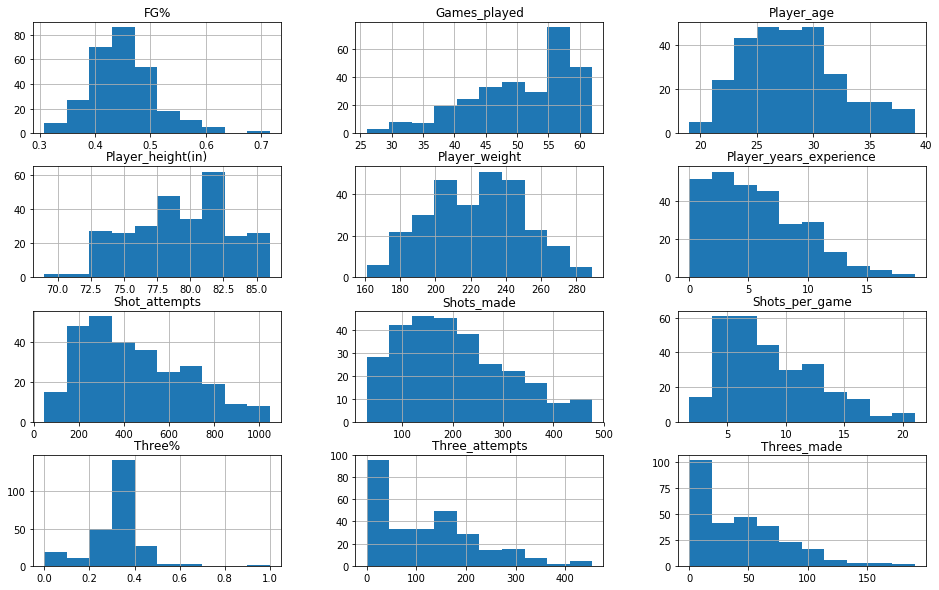

In [83]:
df_eda.hist(figsize=(16,10));

Nothing here unusual or surprising stands out.<br>
As an NBA fan, what is slightly surprising is how many of the players are within 0-5 years of experience and the sharp decline after year 7.

Let's use **Joint Plots** to check the correlation between each feature and the FG%.

C:\Users\adcha\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


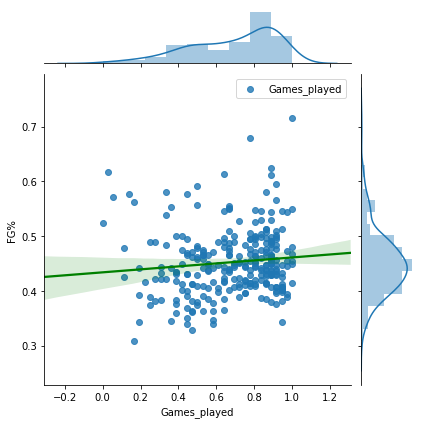

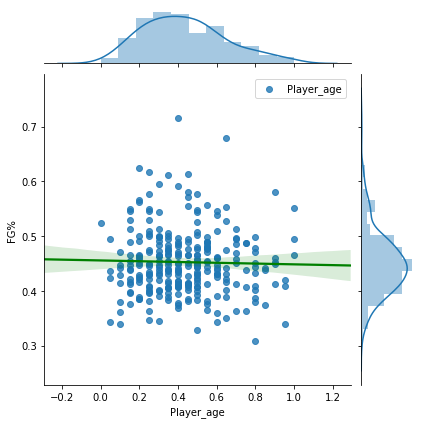

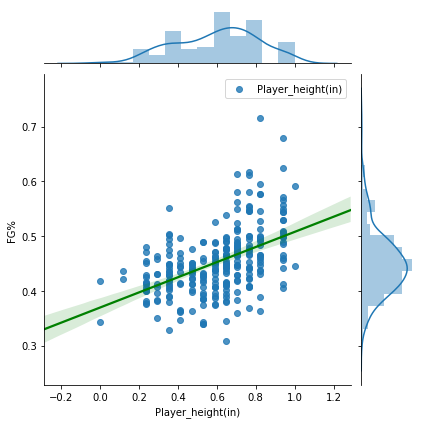

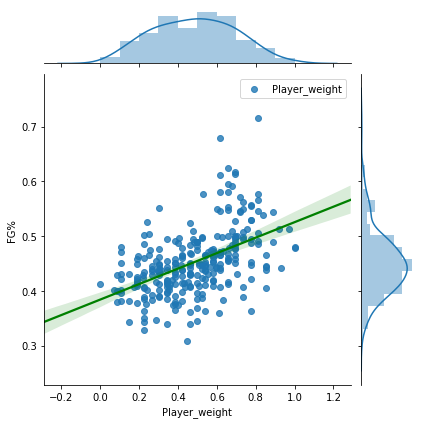

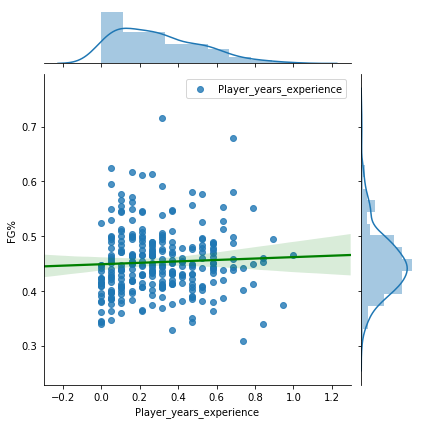

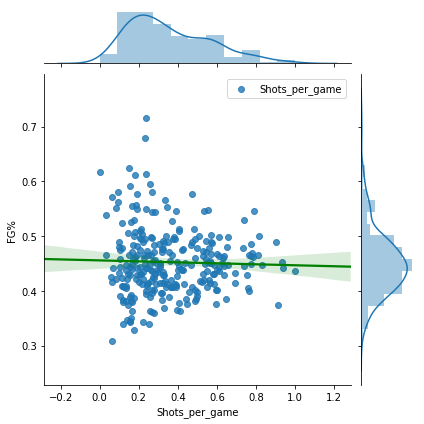

In [84]:
# Saving the list of columns
columns = ['Games_played','Player_age','Player_height(in)','Player_weight','Player_years_experience','Shots_per_game','FG%']
columns_notarget = ['Games_played','Player_age','Player_height(in)','Player_weight','Player_years_experience','Shots_per_game']

df_fg = df_eda[columns]

# MinMaxScaling the Features
df_fg[columns_notarget] = MinMaxScaler().fit_transform(df_fg[columns_notarget])

# Assigning the features and target variable
X = df_fg.drop('FG%', axis=1)
y = df_fg['FG%']

# Creating the joint plots
columns = list(df_fg.columns.values)
columns.remove('FG%')

for column in columns_notarget:
    sns.jointplot(x=df_fg[column],
                  y=df_fg['FG%'],
                  data=df_fg,
                  kind='reg',
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

looks like the largest correlation to high FG% is the player's height/weight. However, height and weight are very correlated to each other so it should count as one attribute.<br>
The biggest takeaway here is that bigger players (Power Forwards or Centers) have higher FG%.

Same **Joint Plots** but for 3Pointers.

C:\Users\adcha\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


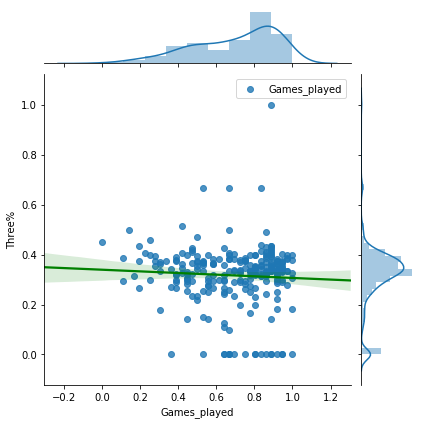

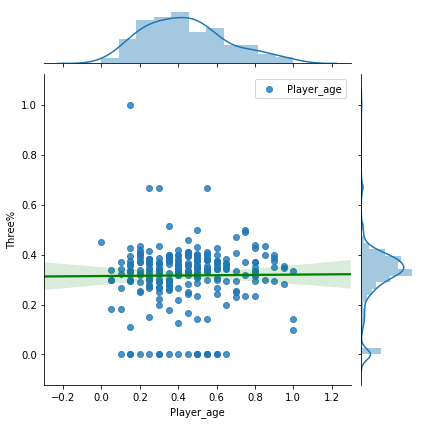

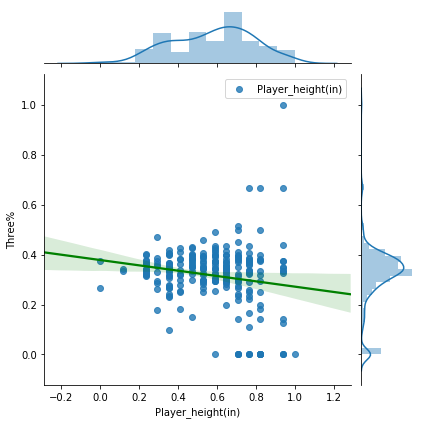

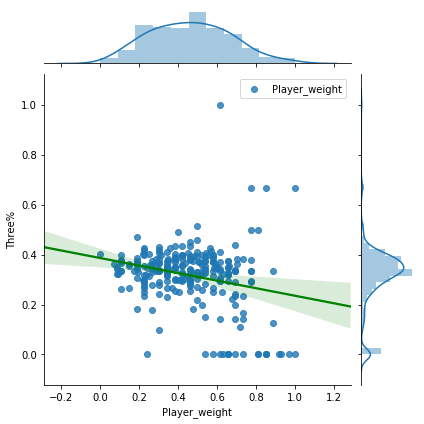

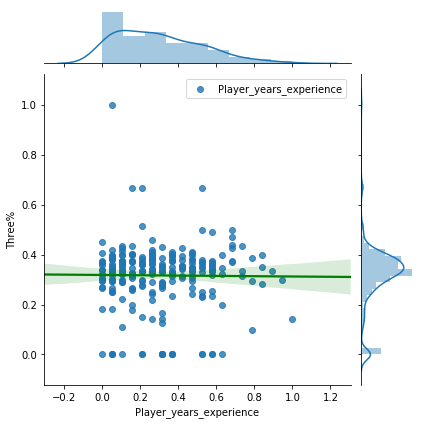

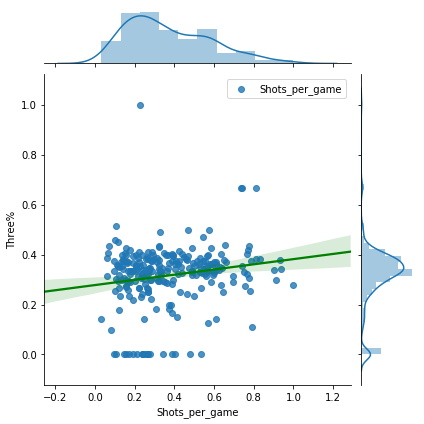

In [85]:
# Saving the list of columns
columns = ['Games_played','Player_age','Player_height(in)','Player_weight','Player_years_experience','Shots_per_game','Three%']
columns_notarget = ['Games_played','Player_age','Player_height(in)','Player_weight','Player_years_experience','Shots_per_game']

df_three = df_eda[columns]
df_three

# MinMaxScaling the Features
df_three[columns_notarget] = MinMaxScaler().fit_transform(df_three[columns_notarget])

# Assigning the features and target variable
X = df_three.drop('Three%', axis=1)
y = df_three['Three%']

# Creating the joint plots
columns = list(df_three.columns.values)
columns.remove('Three%')

for column in columns_notarget:
    sns.jointplot(x=df_three[column],
                  y=df_three['Three%'],
                  data=df_three,
                  kind='reg',
                  label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

Same idea as FG% but the opposite. The smaller players (Guards or Forwards) shoot a higher 3-point%.<br>
Interestingly, 3-point% vs fg%, the regression line for each joint plot is almost the opposite. Even the lesser correlated features are opposite.

A **Scatter Plot** of every player's season FG%, in descending order.

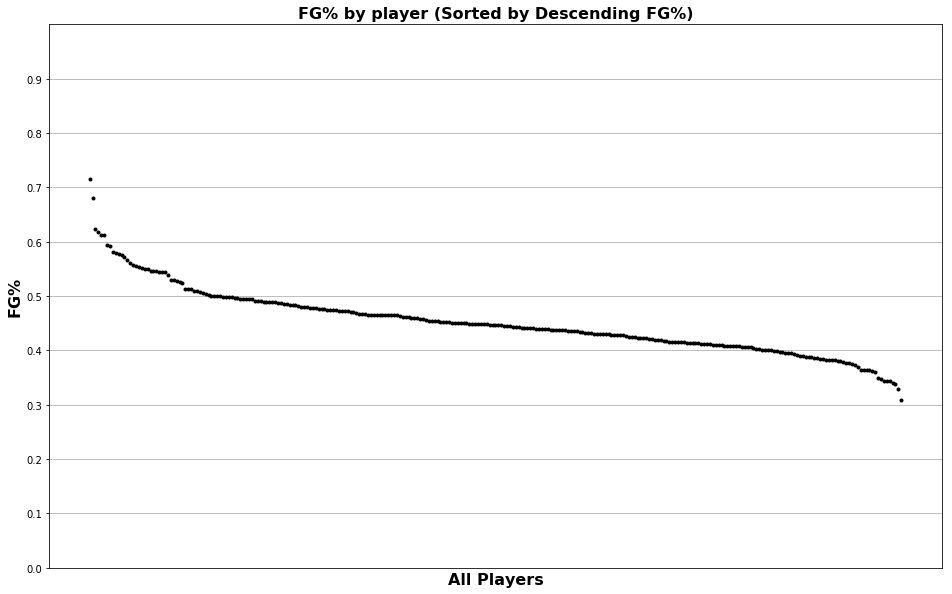

Total FG%: 45.24


In [86]:
fg_sort = df_eda.sort_values('FG%', ascending=False)

plt.figure(figsize=(16,10))
plt.plot(fg_sort['FG%'].values, 'ko', ms=3)
plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.xticks([])
plt.grid(axis='y')

font = {'weight':'bold',
       'size': 16}
plt.title('FG% by player (Sorted by Descending FG%)', **font)
plt.ylabel('FG%', **font)
plt.xlabel('All Players', **font)
plt.show()
print("Total FG%:",format(round(df_eda['FG%'].mean(),4)*100))

In [87]:
fg_sort[['Player_position','FG%','Shot_attempts']].loc[fg_sort['Shot_attempts'] >= 200].head(10)

,Player_position,FG%,Shot_attempts
Player_name,,,
DeAndre Jordan,C,0.7154,390
Tyson Chandler,C,0.6796,334
Rudy Gobert,C,0.6241,266
James Johnson,F,0.6129,310
Ed Davis,F,0.6113,301
Mason Plumlee,C-F,0.5945,397
Alexis Ajinca,C,0.5913,208
Amir Johnson,F-C,0.5797,395
John Henson,C-F,0.5771,227


Players with top 10 FG% are all Forwards or Centers. Makes sense.

A **Regression Analysis** to show the effect of Shot Attempts on FG%.

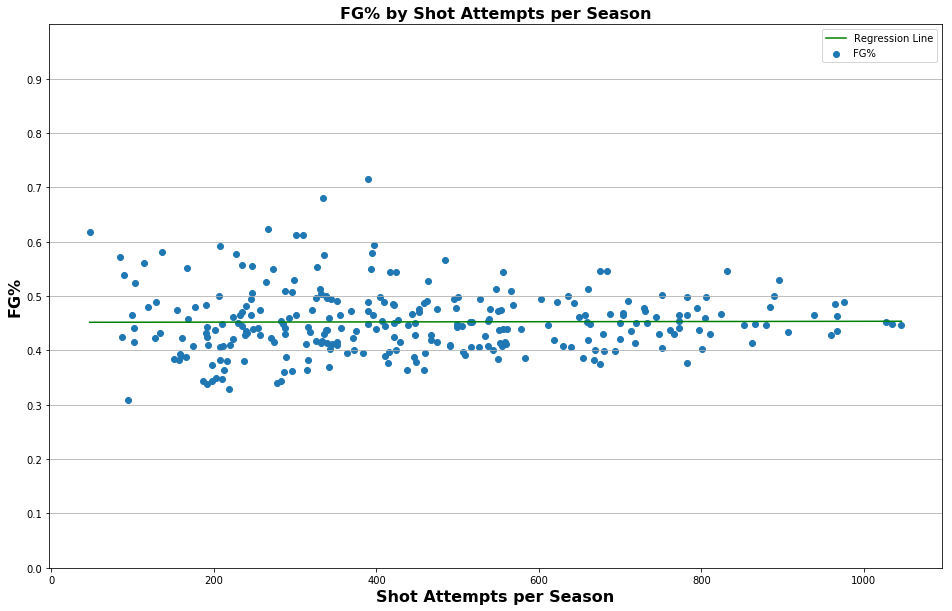

In [88]:
shot_attempts_sort = df_eda.sort_values('Shot_attempts', ascending=True)
X = shot_attempts_sort['Shot_attempts']
y = shot_attempts_sort['FG%']


plt.figure(figsize=(16,10))
plt.scatter(X, y)
plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.grid(axis='y')

plt.title('FG% by Shot Attempts per Season', **font)
plt.ylabel('FG%', **font)
plt.xlabel('Shot Attempts per Season', **font)

b, m = polyfit(X, y, 1)
plt.plot(X, b+m*X,'-',color='green', label='Regression Line') 
plt.legend()
plt.show()

Increasing Shot attempts has no effect on FG%.<br>
I would've thought that Star Players would who shoot the ball more would have a higher FG% but not the case at all.<br>
Probably because Star Players play more Iso-ball or "1on1" basketball, lowering their FG%, while role players are more "Catch and Shoot" players.<br>
Because of this, it will be interesting to see how 'Touch Time' can effect FG%.

In [89]:
# We are adding the Avg Touch Time field to our eda dataset
avg_touchtime = players_df2[['Player_name','TOUCH_TIME']].groupby('Player_name').mean()
df_eda = df_eda.join(avg_touchtime)

A **Regression Analysis** to show the effect of Touch Time on FG%

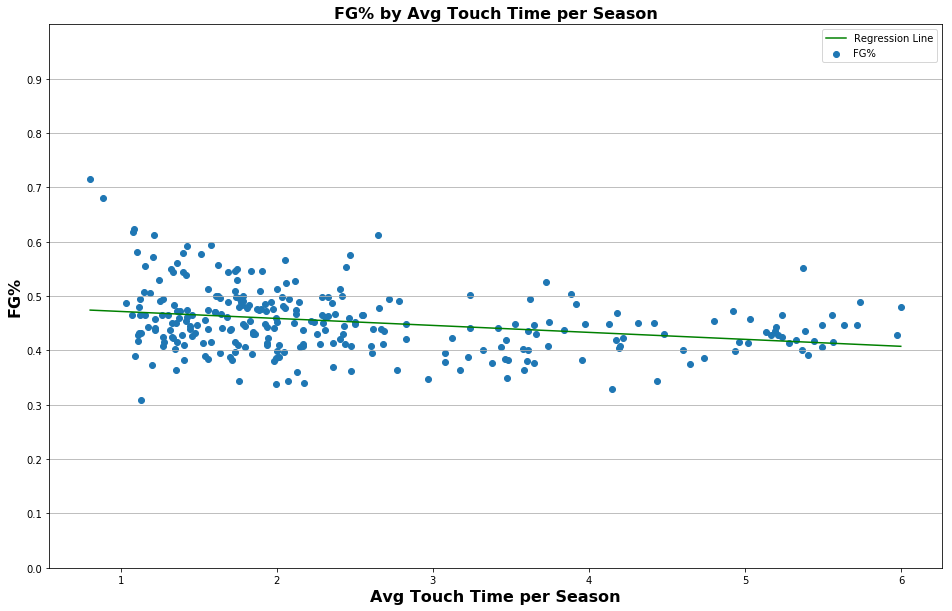

In [90]:
touch_time_sort = df_eda.sort_values('TOUCH_TIME', ascending=False)
X = touch_time_sort['TOUCH_TIME']
y = touch_time_sort['FG%']


plt.figure(figsize=(16,10))
plt.scatter(X, y)
plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.grid(axis='y')

plt.title('FG% by Avg Touch Time per Season', **font)
plt.ylabel('FG%', **font)
plt.xlabel('Avg Touch Time per Season', **font)

b, m = polyfit(X, y, 1)
plt.plot(X, b+m*X,'-',color='green', label='Regression Line') 
plt.legend()
plt.show()

As predicted, although not significantly, the FG% decreases as the Avg Touch Time increases.

In [91]:
touch_time_sort[['Player_position','FG%','TOUCH_TIME']].loc[fg_sort['Shot_attempts'] >= 200].head(10)

,Player_position,FG%,TOUCH_TIME
Player_name,,,
Chris Paul,G,0.4796,5.997285
Dennis Schroder,G,0.4286,5.975670
LeBron James,F-G,0.4887,5.734631
James Harden,G,0.4474,5.719694
John Wall,G,0.4460,5.630869
Elfrid Payton,G,0.4147,5.565895
Jeff Teague,G,0.4642,5.559361
D.J. Augustin,G,0.4068,5.492586
Jarrett Jack,G,0.4468,5.489853


On second thought, after looking at this list of players with top 10 Avg Touch Time, I see that they are all Point Guards (except Lebron but he plays like a Point Guard). Meaning their Touch Time is inflated because they bring the ball down the court.

Because of the joint plots, We already know that smaller players have lower FG%. It seems that Multicollinearity is in play where a Player's Height/Weight is strongly negative correlated to a Player's Touch Time.

In [92]:
df_eda[['Player_height(in)','Player_weight','TOUCH_TIME']].corr()

,Player_height(in),Player_weight,TOUCH_TIME
Player_height(in),1.000000,0.847254,-0.693229
Player_weight,0.847254,1.000000,-0.584559
TOUCH_TIME,-0.693229,-0.584559,1.000000


A test like this should be conducted by splitting the dataset by position.<br>A **Backcourt** dataset (G or G-F) and **Frontcourt** dataset (F or F-C or C).

A **Regression Analysis** to show the effect of Avg Shots Per Game on FG%.

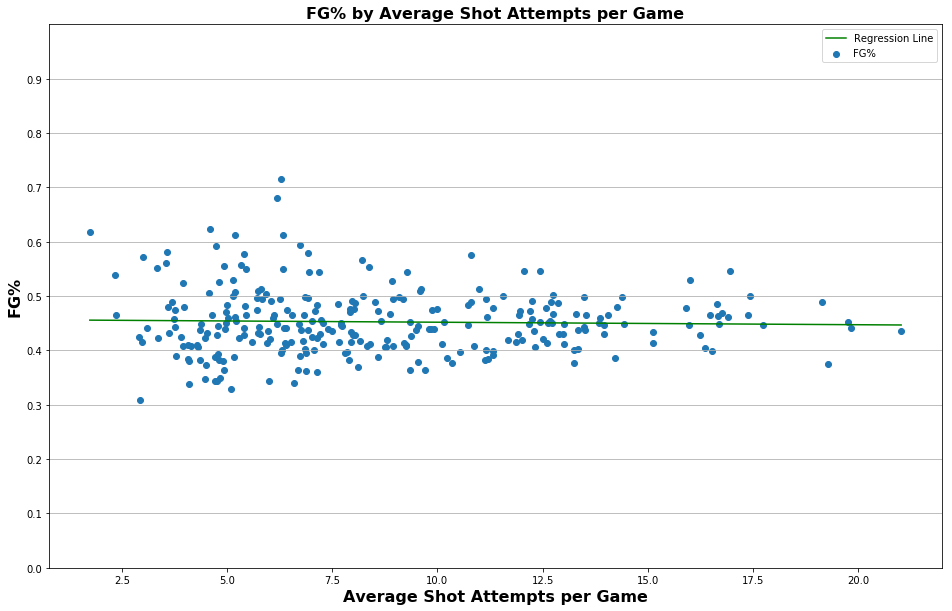

In [93]:
shot_attempts_per_game_sort = df_eda.sort_values('Shots_per_game', ascending=True)
X = shot_attempts_per_game_sort['Shots_per_game']
y = shot_attempts_per_game_sort['FG%']


plt.figure(figsize=(16,10))
plt.scatter(X, y)
plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.grid(axis='y')

plt.title('FG% by Average Shot Attempts per Game', **font)
plt.ylabel('FG%', **font)
plt.xlabel('Average Shot Attempts per Game', **font)

b, m = polyfit(X, y, 1)
plt.plot(X, b+m*X,'-',color='green', label='Regression Line') 
plt.legend()
plt.show()

Similar to Shot Attempts in the Season, Avg Shot Attempts per Game has no effect on FG%.

A **Scatter Plot** on 3-Point% per player, in descending order

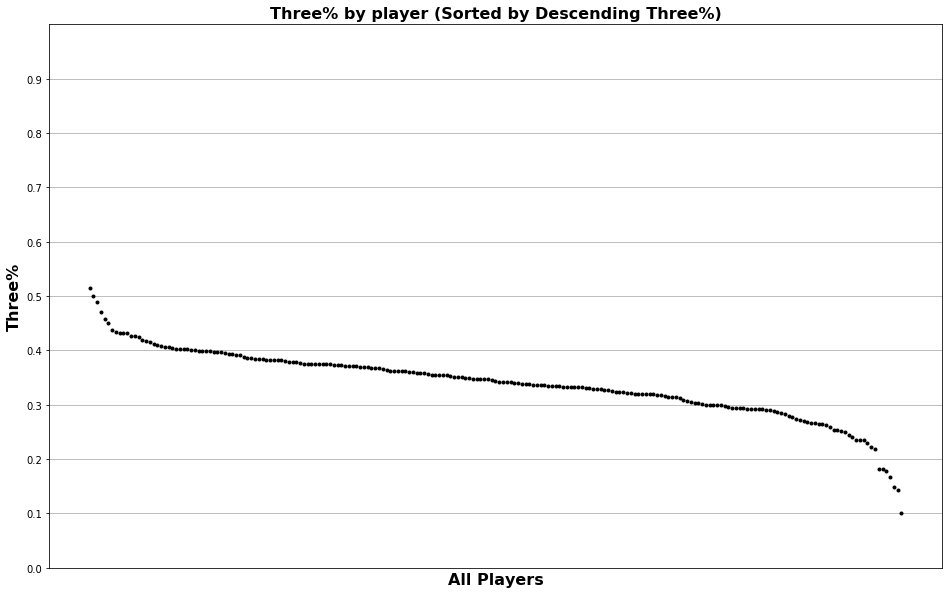

Total Three% (At least 10 attempts): 33.96


In [94]:
three_sort = df_eda.loc[df_eda['Three_attempts'] > 9].sort_values('Three%', ascending=False)

plt.figure(figsize=(16,10))
plt.plot(three_sort['Three%'].values, 'ko', ms=3)
plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.xticks([])
plt.grid(axis='y')

font = {'weight':'bold',
       'size': 16}
plt.title('Three% by player (Sorted by Descending Three%)', **font)
plt.ylabel('Three%', **font)
plt.xlabel('All Players', **font)
plt.show()
print("Total Three% (At least 10 attempts):",format(round(three_sort['Three%'].mean(),4)*100))

A **Regression Analysis** on 3-Point attempts per season.

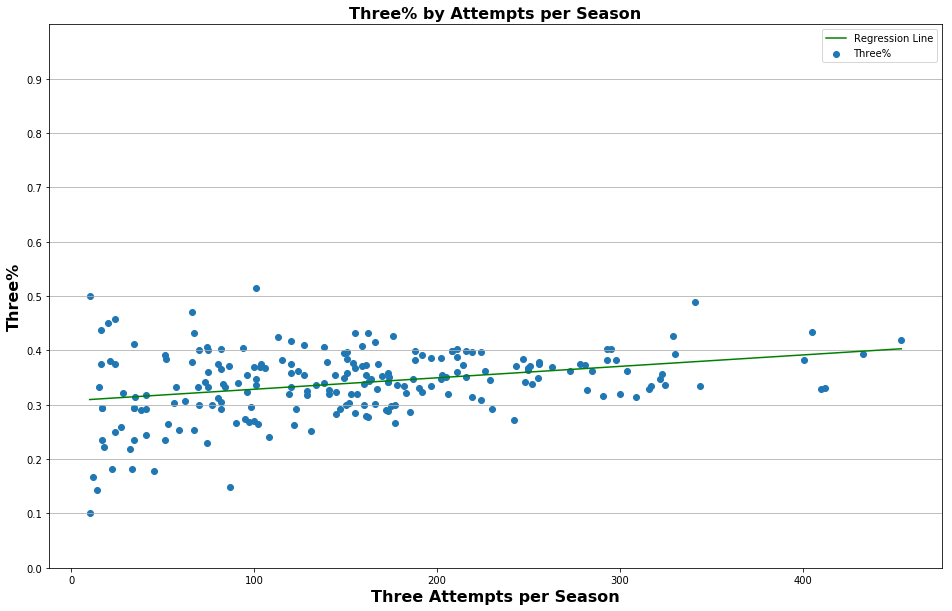

In [95]:
three_attempts_sort = df_eda.loc[df_eda['Three_attempts'] > 9].sort_values('Three_attempts', ascending=True)
X = three_attempts_sort['Three_attempts']
y = three_attempts_sort['Three%']


plt.figure(figsize=(16,10))
plt.scatter(X, y)
plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.grid(axis='y')

plt.title('Three% by Attempts per Season', **font)
plt.ylabel('Three%', **font)
plt.xlabel('Three Attempts per Season', **font)

b, m = polyfit(X, y, 1)
plt.plot(X, b+m*X,'-',color='green', label='Regression Line') 
plt.legend()
plt.show()

Interestingly, unlike FG% vs Shot Attempts, the 3-Point% is higher with more attempts in a season.

In [96]:
df_eda[['Shot_attempts','FG%','Three_attempts','Three%']].corr()

,Shot_attempts,FG%,Three_attempts,Three%
Shot_attempts,1.000000,0.007166,0.512700,0.151783
FG%,0.007166,1.000000,-0.468246,-0.206116
Three_attempts,0.512700,-0.468246,1.000000,0.360127
Three%,0.151783,-0.206116,0.360127,1.000000


There are so many more graphs to explore if I split the dataset based on criteria...
- Backcourt (G or F) vs Frontcourt (F or C)
- 3-Point Specialist ( >200 3-point attempts) vs Not ( <200)
- Star players(Top Avg Shot attempts per team) vs all other players

but I'm starting to digress from the main task so I will move on.

### d) Data Visualization for Model Dataset
Now we will make visualizations for the Dataset that will be used in the ML Models.<br>
This is the dataset where each row is unique per shot.

#### Set the Features and Target

In [97]:
Target = players_df2["SHOT_RESULT"]

In [98]:
headers = ["Location_H",
           "Location_A",
           "Match_Outcome_W",
           "Match_Outcome_L",
           "FINAL_MARGIN",
           "SHOT_NUMBER",
           "PERIOD",
           "GAME_CLOCK",
           "SHOT_CLOCK",
           "DRIBBLES",
           "TOUCH_TIME",
           "SHOT_DIST",
           "PTS_TYPE",
           "Defender_distance",
           "Defender_years_experience",
           "Defender_G",
           "Defender_F",
           "Defender_C",
           "Defender_height(in)",
           "Defender_weight",
           "Defender_age",
           "Player_years_experience",
           "Player_G",
           "Player_F",
           "Player_C",
           "Player_height(in)",
           "Player_weight",
           "Player_age",
           "Height_Diff"]
Features = players_df2[headers]

#### Feature Importance

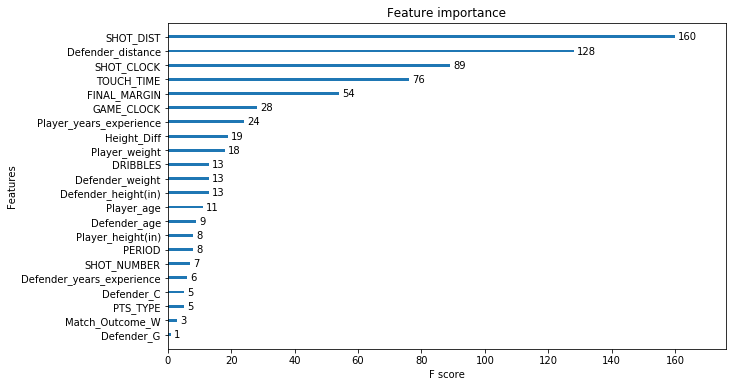

In [99]:
model = XGBClassifier()
model.fit(Features, Target)
ax = plot_importance(model)
fig = ax.figure
ax.grid(False)
fig.set_size_inches(10,6)
plt.show()

#### Top 4 Feature Importances
We will use **Line Graphs** to show the Average Shot% at each point.

1) **Shot Distance**

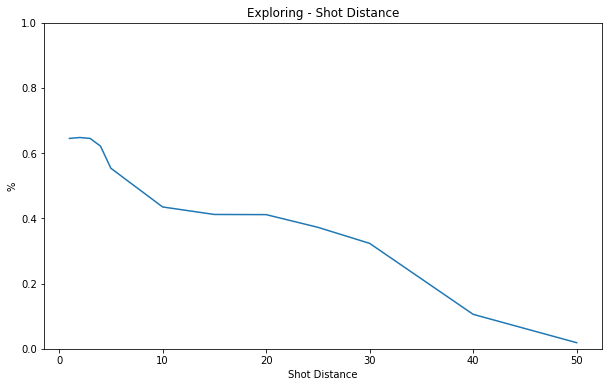

In [100]:
distances = [0,1,2,3,4,5,10,15,20,25,30,40,50]

shot_made = [(players_df2[np.logical_and(np.logical_and(players_df2['SHOT_DIST']>distances[i-1],
                                         players_df2['SHOT_DIST']<distances[i]),
                         players_df2['SHOT_RESULT']==1)].size/players_df2[np.logical_and(players_df2['SHOT_DIST']>distances[i-1],
                                                                                             players_df2['SHOT_DIST']<distances[i])].size) for i in range(1,len(distances))]

lambda_results = pd.Series(shot_made, index = distances[1:len(distances)])
plt.figure(figsize=(10,6))
lambda_results.plot(title = 'Exploring - Shot Distance')
plt.xlabel('Shot Distance')
plt.ylabel('%')
plt.ylim(0,1)
plt.show()

Farther the shot, the less likely it'll go in

2) **Defender Distance**

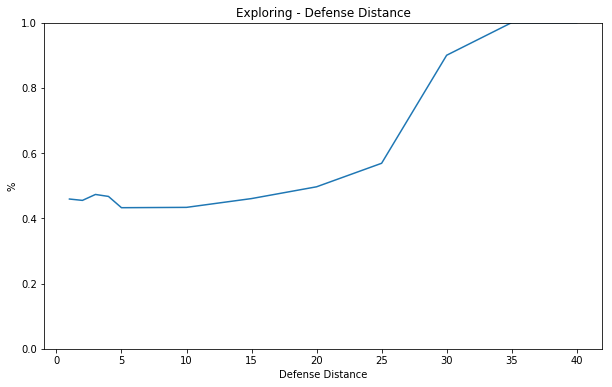

In [101]:
distances = [0,1,2,3,4,5,10,15,20,25,30,35,40]

close_defense = [(players_df2[np.logical_and(np.logical_and(players_df2['Defender_distance']>distances[i-1],
                                         players_df2['Defender_distance']<distances[i]),
                         players_df2['SHOT_RESULT']==1)].size/players_df2[np.logical_and(players_df2['Defender_distance']>distances[i-1],
                                                                                             players_df2['Defender_distance']<distances[i])].size) for i in range(1,len(distances))]

lambda_results = pd.Series(close_defense, index = distances[1:len(distances)])
plt.figure(figsize=(10,6))
lambda_results.plot(title = 'Exploring - Defense Distance')
plt.xlabel('Defense Distance')
plt.ylabel('%')
plt.ylim(0,1)
plt.show()

Farther the defender from the shooter, the more likely it'll go in

3) **Shot Clock**

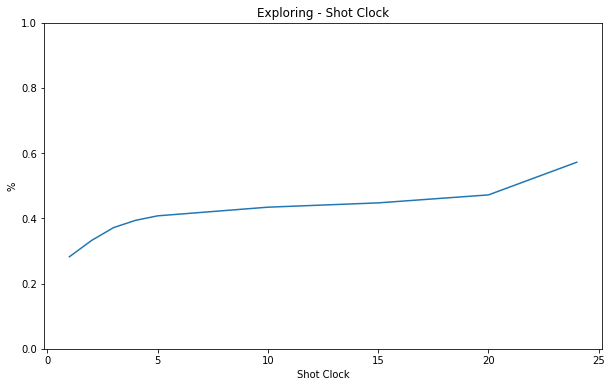

In [102]:
time = [0,1,2,3,4,5,10,15,20,24]

shot_clock = [(players_df2[np.logical_and(np.logical_and(players_df2['SHOT_CLOCK']>time[i-1],
                                         players_df2['SHOT_CLOCK']<time[i]),
                         players_df2['SHOT_RESULT']==1)].size/players_df2[np.logical_and(players_df2['SHOT_CLOCK']>time[i-1],
                                                                                             players_df2['SHOT_CLOCK']<time[i])].size) for i in range(1,len(time))]

lambda_results = pd.Series(shot_clock, index = time[1:len(time)])
plt.figure(figsize=(10,6))
lambda_results.plot(title = 'Exploring - Shot Clock')
plt.xlabel('Shot Clock')
plt.ylabel('%')
plt.ylim(0,1)
plt.show()

The more time left on the clock, the more likely it'll go in

4) **Touch Time**

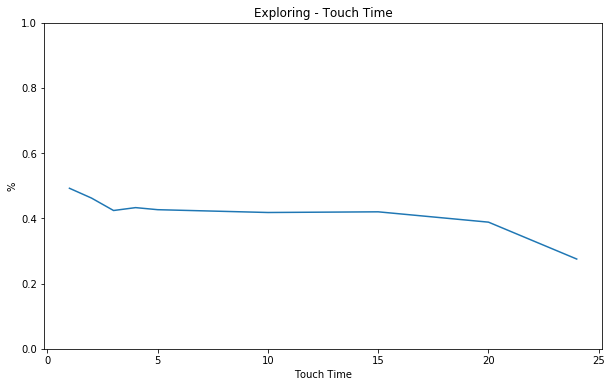

In [103]:
time = [0,1,2,3,4,5,10,15,20,24]

close_defense = [(players_df2[np.logical_and(np.logical_and(players_df2['TOUCH_TIME']>time[i-1],
                                         players_df2['TOUCH_TIME']<time[i]),
                         players_df2['SHOT_RESULT']==1)].size/players_df2[np.logical_and(players_df2['TOUCH_TIME']>time[i-1],
                                                                                             players_df2['TOUCH_TIME']<time[i])].size) for i in range(1,len(time))]

lambda_results = pd.Series(close_defense, index = time[1:len(time)])
plt.figure(figsize=(10,6))
lambda_results.plot(title = 'Exploring - Touch Time')
plt.xlabel('Touch Time')
plt.ylabel('%')
plt.ylim(0,1)
plt.show()

The longer the player holds onto the ball before shooting, the less likely it'll go in

Nothing out of the ordinary here, let's move forward with the modeling!

# 5) Model the Data

The gameplan here is to start by making basic pipelines for all the Model Classifiers. From there, we will start building individual pipelines for the more accurate models.

## Train-Test-Split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(Features.values, Target.values, test_size=0.25, random_state=81)

## Baseline Pipes
We will run basic pipelines for each classification model.<br>
_Note* Data needs to be standardized for KNearest Neighbors because of relative distance between points_

In [178]:
# Initializing all the pipelines
pipe_kn = Pipeline([('scale', StandardScaler()),
                    ('kn_model', KNeighborsClassifier())])

pipe_tree = Pipeline([('dt_model', DecisionTreeClassifier(random_state=81))])

pipe_bag = Pipeline([('bag_model', BaggingClassifier(DecisionTreeClassifier(random_state=81)))])

pipe_rf = Pipeline([('rf_model', RandomForestClassifier(random_state=81))])

pipe_ada = Pipeline([('ada_model', AdaBoostClassifier(random_state=81))])

pipe_gbt = Pipeline([('gbt_model', GradientBoostingClassifier(random_state=81))])

pipe_xgb = Pipeline([('xgb_model', XGBClassifier(random_state=81))])

In [179]:
# Fitting all the pipelines with our data

pipelines = [pipe_kn, pipe_tree, pipe_bag, pipe_rf, pipe_ada, pipe_gbt, pipe_xgb]
pipeline_names = ['KNeighbors','Decision Tree', 'Bagged Trees', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']

for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)
    print('---------------------------------------------------')

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kn_model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
---------------------------------------------------
Pipeline(memory=None,
     steps=[('dt_model', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=81,
            splitter='best'))])
---------------------------------------------------
Pipeline(memory=None,
     steps=[('bag_model', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
   

In [180]:
# Obtaining the score for each pipeline

for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

KNeighbors pipeline test accuracy: 0.550
Decision Tree pipeline test accuracy: 0.543
Bagged Trees pipeline test accuracy: 0.585
Random Forest pipeline test accuracy: 0.586
AdaBoost pipeline test accuracy: 0.616
Gradient Boosting pipeline test accuracy: 0.623
XGBoost pipeline test accuracy: 0.622


It's important for us to visualize which features matter the most in our models. Below is a function that will plot all the feature's importance level for the model we input.

In [155]:
def plot_feature_importances(model):
    n_features = Features.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), Features.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

Moving onto our first model, **Decision Trees**.

## DecisionTreeClassifier
Rule-based classifier. Every internal node checks for a condition and performs a decision. Each path from the root of a decision tree to one of its leaves can be transformed into a rule simply by combining decisions long the path.

### Baseline Model

In [156]:
# Initializing and fitting our Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

predictions = dt_model.predict(X_test)
actuals = y_test

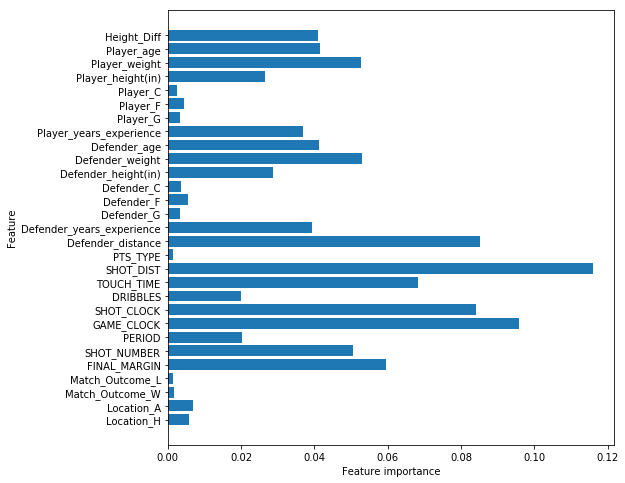

In [157]:
# Using our function from before, plotting the feature importance levels
plot_feature_importances(dt_model)

In [158]:
dt_model_train_score = dt_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(dt_model_train_score * 100))

dt_model_test_score = dt_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(dt_model_test_score * 100))

dt_cv_score = np.mean(cross_val_score(dt_model, Features, Target, cv=3))
print("Cross Val Score: {:.4}%".format(dt_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 100.0%
Testing Accuracy: 54.12%
Cross Val Score: 54.01%
AUC is : 53.76%

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     17238
           1       0.49      0.50      0.50     14223

   micro avg       0.54      0.54      0.54     31461
   macro avg       0.54      0.54      0.54     31461
weighted avg       0.54      0.54      0.54     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,9916,7322,17238
1,7112,7111,14223
All,17028,14433,31461


We've **Overtrained** our dataset. Below we will tune our parameters to prevent this.

### Grid Search DecisionTree

In [164]:
# Set grid search params
param_grid_dt = [
    {'dt_model__criterion': ['entropy','gini'],
    'dt_model__max_depth': [3,4,5,6,7,8],
    'dt_model__min_samples_split': [0.01,0.1],
    'dt_model__min_samples_leaf': [0.01,0.1]}
]

# Construct Grid Search
gs_dt = GridSearchCV(estimator=pipe_tree,
                    param_grid=param_grid_dt,
                    scoring='accuracy',
                    cv=4, n_jobs=-1, verbose=1)

# Fit using grid search
gs_dt.fit(Features, Target)

# Best accuracy and parameters
print('Best accuracy: {:.4}%'.format(gs_dt.best_score_ * 100))
print('Best Params:\n', gs_dt.best_params_)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.1min finished


Best accuracy: 61.88%
Best Params:
 {'dt_model__criterion': 'gini', 'dt_model__max_depth': 6, 'dt_model__min_samples_leaf': 0.001, 'dt_model__min_samples_split': 0.001}


In [165]:
dt_gs_model = DecisionTreeClassifier(criterion='gini',
                               max_depth=6,
                               min_samples_leaf=0.01,
                               min_samples_split=0.01)
dt_gs_model.fit(X_train, y_train)

predictions = dt_gs_model.predict(X_test)
actuals = y_test

In [166]:
dt_gs_model_train_score = dt_gs_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(dt_gs_model_train_score * 100))

dt_gs_model_test_score = dt_gs_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(dt_gs_model_test_score * 100))

dt_gs_cv_score = np.mean(cross_val_score(dt_gs_model, Features, Target, cv=3))
print("Cross Val Score: {:.4}%".format(dt_gs_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 62.09%
Testing Accuracy: 61.6%
Cross Val Score: 61.57%
AUC is : 59.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.86      0.71     17238
           1       0.65      0.32      0.43     14223

   micro avg       0.62      0.62      0.62     31461
   macro avg       0.63      0.59      0.57     31461
weighted avg       0.63      0.62      0.58     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,14819,2419,17238
1,9662,4561,14223
All,24481,6980,31461


We've increased our Accuracy from a Baseline of **54.12%** to **61.60%**.<br>
Not bad, but let's see if we can do better with ensemble models.

## Random Forest
An ensemble of Decision Trees. High variance among all trees are created by **Bagging** and **Subspace Sampling Method**. Aggregates all predictions together to determine the overall prediction in a "vote".

### Baseline Model

In [167]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)
actuals = y_test

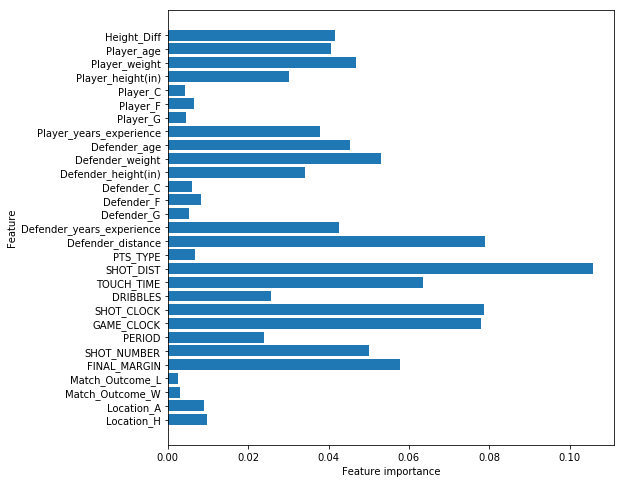

In [168]:
plot_feature_importances(rf_model)

In [169]:
rf_model_train_score = rf_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(rf_model_train_score * 100))

rf_model_test_score = rf_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(rf_model_test_score * 100))

rf_cv_score = np.mean(cross_val_score(rf_model, X_train, y_train, cv=3))
print("Cross Val Score: {:.4}%".format(rf_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 98.25%
Testing Accuracy: 58.79%
Cross Val Score: 58.59%
AUC is : 0.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67     17238
           1       0.56      0.39      0.46     14223

   micro avg       0.59      0.59      0.59     31461
   macro avg       0.58      0.57      0.56     31461
weighted avg       0.58      0.59      0.57     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,12981,4257,17238
1,8709,5514,14223
All,21690,9771,31461


Again, here we've overtrained our model. We will tune our model to prevent the overtraining.

### Random Forest Grid Search

In [170]:
# Set grid search params
param_grid_rf = [
    {'rf_model__criterion': ['entropy','gini'],
    'rf_model__n_estimators': [100,200],
    'rf_model__max_depth': [None,6,10,20],
    'rf_model__min_samples_split': [0.01],
    'rf_model__min_samples_leaf': [0.01]}
]

# Construct Grid Search
gs_rf = GridSearchCV(estimator=pipe_rf,
                    param_grid=param_grid_rf,
                    scoring='accuracy',
                    cv=4, n_jobs=-1, verbose=1)

# Fit using grid search
gs_rf.fit(Features, Target)

# Best accuracy and parameters
print('Best accuracy: {:.4}%'.format(gs_rf.best_score_ * 100))
print('Best Params:\n', gs_rf.best_params_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  4.4min finished


Best accuracy: 61.74%
Best Params:
 {'rf_model__criterion': 'gini', 'rf_model__max_depth': None, 'rf_model__min_samples_leaf': 0.01, 'rf_model__min_samples_split': 0.01, 'rf_model__n_estimators': 200}


In [171]:
rf_gs_model = RandomForestClassifier(criterion='gini',
                                 max_depth=None,
                                 min_samples_leaf=0.01,
                                 min_samples_split=0.01,
                                 n_estimators=200)
rf_gs_model.fit(X_train, y_train)

predictions = rf_gs_model.predict(X_test)
actuals = y_test

In [172]:
rf_gs_model_train_score = rf_gs_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(rf_gs_model_train_score * 100))

rf_gs_model_test_score = rf_gs_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(rf_gs_model_test_score * 100))

rf_gs_cv_score = np.mean(cross_val_score(rf_gs_model, Features, Target, cv=3))
print("Cross Val Score: {:.4}%".format(rf_gs_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 62.09%
Testing Accuracy: 61.78%
Cross Val Score: 61.71%
AUC is : 59.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.83      0.70     17238
           1       0.64      0.36      0.46     14223

   micro avg       0.62      0.62      0.62     31461
   macro avg       0.62      0.60      0.58     31461
weighted avg       0.62      0.62      0.59     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,14356,2882,17238
1,9141,5082,14223
All,23497,7964,31461


We went from a **58.79%** Baseline accuracy to **61.78%** Tuned Accuracy.<br>
Let's try Boosting Methods

## Adaboost
Each learner is trained on a subsample of dataset, **Bagging**. Each data point has weight assigned. If learner correctly classifies an example, the example's weight is reduced. If learner gets example wrong, the example's weight is increased.

As number of learners grows, easy examples will become less prevalent in samples used to train new each new learner. Instead, it will contain harder examples where the learner will create splits that focuses on getting them correct.

### Adaboost Baseline

In [181]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

predictions = ada_model.predict(X_test)
actuals = y_test

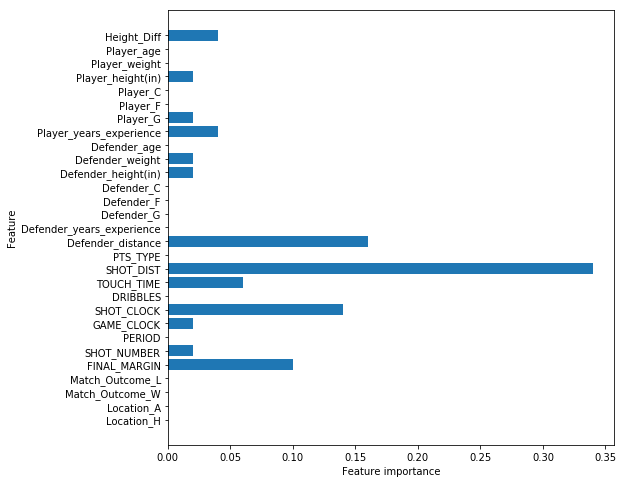

In [182]:
plot_feature_importances(ada_model)

In [183]:
ada_model_train_score = ada_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(ada_model_train_score * 100))

ada_model_test_score = ada_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(ada_model_test_score * 100))

ada_cv_score = np.mean(cross_val_score(ada_model, X_train, y_train, cv=3))
print("Cross Val Score: {:.4}%".format(ada_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 61.79%
Testing Accuracy: 61.64%
Cross Val Score: 61.65%
AUC is : 60.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69     17238
           1       0.61      0.43      0.50     14223

   micro avg       0.62      0.62      0.62     31461
   macro avg       0.61      0.60      0.60     31461
weighted avg       0.61      0.62      0.60     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,13241,3997,17238
1,8071,6152,14223
All,21312,10149,31461


The baseline boosting methods are not overtraining our data, which is good.<br> Let's attempt to Tune our model anyways.

### Adaboost Grid Search

In [190]:
# Set grid search params
param_grid_ada = [
    {'ada_model__n_estimators': [200,250,300],
    'ada_model__learning_rate': [0.1]}
]

# Construct Grid Search
gs_ada = GridSearchCV(estimator=pipe_ada,
                    param_grid=param_grid_ada,
                    scoring='accuracy',
                    cv=4, n_jobs=-1, verbose=1)

# Fit using grid search
gs_ada.fit(Features, Target)

# Best accuracy and parameters
print('Best accuracy: {:.4}%'.format(gs_ada.best_score_ * 100))
print('Best Params:\n', gs_ada.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  3.0min remaining:   35.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.0min finished


Best accuracy: 61.85%
Best Params:
 {'ada_model__learning_rate': 0.1, 'ada_model__n_estimators': 300}


In [191]:
ada_gs_model = AdaBoostClassifier(n_estimators=300,
                                   learning_rate=0.1)
ada_gs_model.fit(X_train, y_train)

predictions = ada_gs_model.predict(X_test)
actuals = y_test

In [193]:
ada_gs_model_train_score = ada_gs_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(ada_gs_model_train_score * 100))

ada_gs_model_test_score = ada_gs_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(ada_gs_model_test_score * 100))

ada_gs_cv_score = np.mean(cross_val_score(ada_gs_model, Features, Target, cv=3))
print("Cross Val Score: {:.4}%".format(ada_gs_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 61.92%
Testing Accuracy: 61.88%
Cross Val Score: 61.79%
AUC is : 60.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.79      0.69     17238
           1       0.62      0.41      0.49     14223

   micro avg       0.62      0.62      0.62     31461
   macro avg       0.62      0.60      0.59     31461
weighted avg       0.62      0.62      0.60     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,13657,3581,17238
1,8411,5812,14223
All,22068,9393,31461


**61.64%** to **61.88%**... not much of an upgrade.

## Gradient Boosting
Starts off with a weak learner. Gradient Boosting calculates the **Residuals** of each data point, then combines with a **Loss Function** to calculate overall loss. Then use the gradients and loss as predictors to train the next tree against. **Gradient Descent**

### Gradient Boosting Baseline

In [194]:
gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

predictions = gbt_model.predict(X_test)
actuals = y_test

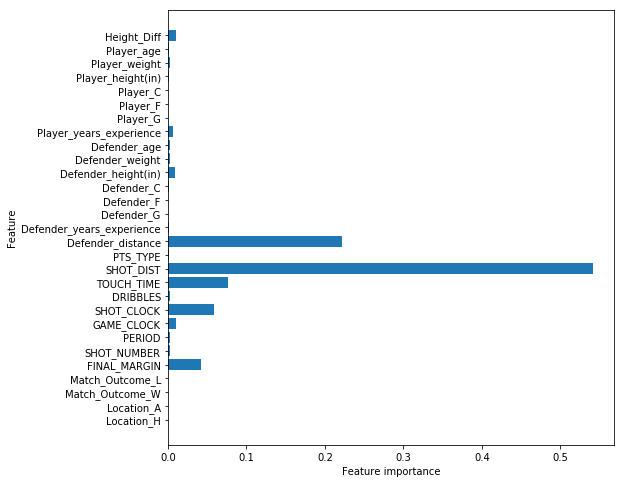

In [195]:
plot_feature_importances(gbt_model)

In [196]:
gbt_model_train_score = gbt_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(gbt_model_train_score * 100))

gbt_model_test_score = gbt_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(gbt_model_test_score * 100))

gbt_cv_score = np.mean(cross_val_score(gbt_model, X_train, y_train, cv=3))
print("Cross Val Score: {:.4}%".format(gbt_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 62.67%
Testing Accuracy: 62.31%
Cross Val Score: 62.2%
AUC is : 59.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     17238
           1       0.65      0.35      0.46     14223

   micro avg       0.62      0.62      0.62     31461
   macro avg       0.63      0.60      0.58     31461
weighted avg       0.63      0.62      0.60     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,14596,2642,17238
1,9217,5006,14223
All,23813,7648,31461


Not a bad start for the Baseline of Gradient Boosting Model

### Gradient Boosting Grid Search

In [200]:
# Set grid search params
param_grid_gbt = [
    {'gbt_model__n_estimators': [100,200],
    'gbt_model__learning_rate': [0.1,0.01],
    'gbt_model__min_samples_split': [0.01],
    'gbt_model__min_samples_leaf': [0.01],
    'gbt_model__max_depth': [2,5,10]}
]

# Construct Grid Search
gs_gbt = GridSearchCV(estimator=pipe_gbt,
                    param_grid=param_grid_gbt,
                    scoring='accuracy',
                    cv=4, n_jobs=-1, verbose=1)

# Fit using grid search
gs_gbt.fit(Features, Target)

# Best accuracy and parameters
print('Best accuracy: {:.4}%'.format(gs_gbt.best_score_ * 100))
print('Best Params:\n', gs_gbt.best_params_)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed: 122.4min finished


Best accuracy: 62.17%
Best Params:
 {'gbt_model__learning_rate': 0.01, 'gbt_model__max_depth': 10, 'gbt_model__min_samples_leaf': 0.01, 'gbt_model__min_samples_split': 0.05, 'gbt_model__n_estimators': 200}


In [203]:
gbt_gs_model = GradientBoostingClassifier(learning_rate=0.01,
                                         max_depth=10,
                                         min_samples_leaf=0.01,
                                         min_samples_split=0.01,
                                         n_estimators=200)
gbt_gs_model.fit(X_train, y_train)

predictions = gbt_gs_model.predict(X_test)
actuals = y_test

In [204]:
gbt_gs_model_train_score = gbt_gs_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(gbt_gs_model_train_score * 100))

gbt_gs_model_test_score = gbt_gs_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(gbt_gs_model_test_score * 100))

gbt_gs_cv_score = np.mean(cross_val_score(gbt_gs_model, Features, Target, cv=3))
print("Cross Val Score: {:.4}%".format(gbt_gs_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 62.83%
Testing Accuracy: 62.31%
Cross Val Score: 62.03%
AUC is : 59.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     17238
           1       0.66      0.35      0.45     14223

   micro avg       0.62      0.62      0.62     31461
   macro avg       0.63      0.60      0.58     31461
weighted avg       0.63      0.62      0.60     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,14665,2573,17238
1,9286,4937,14223
All,23951,7510,31461


Our Accuracy score stayed exactly the same after tuning our model.<br> Perhaps we may need to explore the hyperparameters more.

## XGBoost
**_eXtreme Gradient Boosting_**<br>
An optimized version of Gradient Boosting.

### XGBoost Baseline

In [205]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)
actuals = y_test

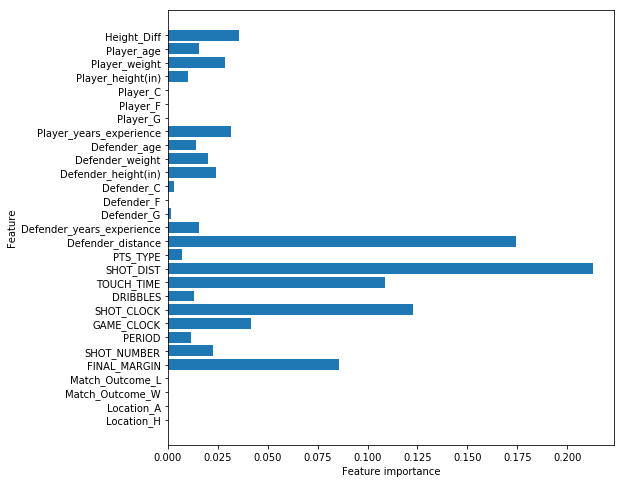

In [206]:
plot_feature_importances(xgb_model)

In [207]:
xgb_model_train_score = xgb_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(xgb_model_train_score * 100))

xgb_model_test_score = xgb_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(xgb_model_test_score * 100))

xgb_cv_score = np.mean(cross_val_score(xgb_model, X_train, y_train, cv=3))
print("Cross Val Score: {:.4}%".format(xgb_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 62.65%
Testing Accuracy: 62.25%
Cross Val Score: 62.21%
AUC is : 59.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     17238
           1       0.65      0.35      0.46     14223

   micro avg       0.62      0.62      0.62     31461
   macro avg       0.63      0.60      0.58     31461
weighted avg       0.63      0.62      0.60     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,14596,2642,17238
1,9236,4987,14223
All,23832,7629,31461


Very similar to Gradient Boosting

### XGBoost Grid Search

In [209]:
# Set grid search params
param_grid_xgb = [
    {'xgb_model__min_child_weight': [0.01,0.1],
    'xgb_model__learning_rate': [0.01,0.1],
    'xgb_model__n_estimators': [50,100],
    'xgb_model__max_depth': [4,6,8]}
]

# Construct Grid Search
gs_xgb = GridSearchCV(estimator=pipe_xgb,
                    param_grid=param_grid_xgb,
                    scoring='accuracy',
                    cv=4, n_jobs=-1, verbose=1)

# Fit using grid search
gs_xgb.fit(Features, Target)

# Best accuracy and parameters
print('Best accuracy: {:.4}%'.format(gs_xgb.best_score_ * 100))
print('Best Params:\n', gs_xgb.best_params_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  6.8min finished


Best accuracy: 62.06%
Best Params:
 {'xgb_model__learning_rate': 0.1, 'xgb_model__max_depth': 4, 'xgb_model__min_child_weight': 0.1, 'xgb_model__n_estimators': 50}


In [210]:
xgb_gs_model = XGBClassifier(learning_rate=0.1,
                             max_depth=4,
                             min_child_weight=0.1,
                             n_estimators=50)
xgb_gs_model.fit(X_train, y_train)

predictions = xgb_gs_model.predict(X_test)
actuals = y_test

In [212]:
xgb_gs_model_train_score = xgb_gs_model.score(X_train, y_train)
print("Training Accuracy: {:.4}%".format(xgb_gs_model_train_score * 100))

xgb_gs_model_test_score = xgb_gs_model.score(X_test, y_test)
print("Testing Accuracy: {:.4}%".format(xgb_gs_model_test_score * 100))

xgb_gs_cv_score = np.mean(cross_val_score(gbt_gs_model, Features, Target, cv=3))
print("Cross Val Score: {:.4}%".format(xgb_gs_cv_score * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {:.4}%".format(roc_auc * 100))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Accuracy: 62.53%
Testing Accuracy: 62.18%
Cross Val Score: 62.03%
AUC is : 59.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     17238
           1       0.66      0.34      0.45     14223

   micro avg       0.62      0.62      0.62     31461
   macro avg       0.63      0.60      0.58     31461
weighted avg       0.63      0.62      0.59     31461


Confusion Matrix: 1=Made, 0=Miss


Predicted,0,1,All
Actual,,,
0,14699,2539,17238
1,9360,4863,14223
All,24059,7402,31461


The model actually went down by a slight bit after tuning.<br>
This may need to be explored more.

# Conclusion
In the current state, our models are performing better than an average random guess. Moving forward, we should use **XGBoost** model because it provides higher than average baseline accuracy at faster speeds than Gradient Boosting. Adding more variation to the grid search will give us a higher accuracy % in our model. Unfortunately, there wasn't enough time to perform the desired variance in grid searching. For now, an accuracy score of **62%** and precision score of **68%** (from the Test 1) All Features - XGB Model) is our final result.

# Extra

## PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Features.values, Target.values, test_size=0.2, random_state=81)

In [229]:
X_train_transform = StandardScaler().fit_transform(X_train)
X_test_transform = StandardScaler().fit_transform(X_test)

In [211]:
explained_variance = []
for n in range(1, len(Features.columns)):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_train_transform)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

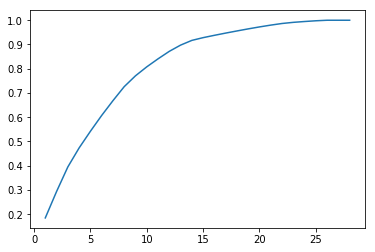

In [212]:
plt.plot(range(1, len(Features.columns)), explained_variance);

In [220]:
result_90 = len(list(filter(lambda x: x <= 0.90, explained_variance))) + 1
result_90

14

In [226]:
n=14

pipe_lr = Pipeline([('pca', PCA(n_components=n)),
                    ('lr_model', LogisticRegression(random_state=81))])

pipe_kn = Pipeline([('pca', PCA(n_components=n)),
                     ('kn_model', KNeighborsClassifier())])

pipe_tree = Pipeline([('pca', PCA(n_components=n)),
                       ('dt_model', DecisionTreeClassifier(random_state=81))])

pipe_bag = Pipeline([('pca', PCA(n_components=n)),
                      ('bag_model', BaggingClassifier(DecisionTreeClassifier(random_state=81)))])

pipe_rf = Pipeline([('pca', PCA(n_components=n)),
                     ('rf_model', RandomForestClassifier(random_state=81))])

pipe_ab = Pipeline([('pca', PCA(n_components=n)),
                     ('ab_model', AdaBoostClassifier(random_state=81))])

pipe_gbt = Pipeline([('pca', PCA(n_components=n)),
                      ('gbt_model', GradientBoostingClassifier(random_state=81))])

pipe_xgb = Pipeline([('pca', PCA(n_components=n)),
                      ('xgb_model', XGBClassifier(random_state=81))])

In [227]:
pipelines = [pipe_lr, pipe_kn, pipe_tree, pipe_bag, pipe_rf, pipe_ab, pipe_gbt, pipe_xgb]
pipeline_names = ['Logistic Regression', 'KNeighbors', 'Decision Tree', 'Bagged Trees', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']

for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)
    print('---------------------------------------------------')

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('lr_model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=81, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])
---------------------------------------------------
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kn_model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
---------------------------------------------------
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=N

In [228]:
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

Logistic Regression pipeline test accuracy: 0.609
KNeighbors pipeline test accuracy: 0.542
Decision Tree pipeline test accuracy: 0.540
Bagged Trees pipeline test accuracy: 0.583
Random Forest pipeline test accuracy: 0.582
AdaBoost pipeline test accuracy: 0.609
Gradient Boosting pipeline test accuracy: 0.617
XGBoost pipeline test accuracy: 0.618


In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

actuals = y_test

In [ ]:
print(confusion_matrix(actuals, predictions))
print(accuracy_score(actuals, predictions))
print(precision_score(actuals, predictions))
print(classification_report(actuals, predictions))

In [ ]:
pca = PCA(n_components=4)

In [ ]:
# Changes data to the components form
X_trans = pca.fit_transform(X_train)

In [ ]:
X_trans_feature_names = ['PCA1','PCA2','PCA3','PCA4']
df_trans = pd.DataFrame(X_trans, columns = X_trans_feature_names)
df_trans['target'] = y_train
df_trans.head()

### Tuning DecisionTree

In [ ]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('tree depth')
plt.legend()
plt.show()

Optimal depth is 6

In [ ]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

AUC for both test and train data stabilizes at 0.2. Optimal value is 0.3

In [ ]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()    

Optimal value is 0.4. Accuracy drops if we continue to increase parameters.

In [ ]:
# Find the best value for optimal maximum feature size
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()    

No effect on training set. Hard to tell with testing set but 12 seems to be the highest peak.

In [ ]:
dt_tune_model = DecisionTreeClassifier(max_features=12,
                               max_depth=6,
                               min_samples_split=0.3,
                               min_samples_leaf=0.4)
dt_tune_model.fit(X_train, y_train)

predictions = dt_tune_model.predict(X_test)
actuals = y_test

In [ ]:
dt_tune_cv_score = np.mean(cross_val_score(dt_tune_model, Features, Target, cv=3))
print("Cross Val Score: {:.4}%".format(dt_tune_cv_score * 100))

acc = accuracy_score(actuals, predictions)
print("Accuracy is : {:.4}%".format(acc * 100))

false_positive_rate, true_positive_rate, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC is : {0}".format(round(roc_auc,2)))

print("\nClassification Report:")
print(classification_report(actuals, predictions))

print("\nConfusion Matrix: 1=Made, 0=Miss")
pd.crosstab(actuals, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [ ]:
pca.explained_variance_

In [ ]:
pca = PCA()
X_all = pca.fit_transform(X_train)
pca.explained_variance_

In [ ]:
pca.components_

In [ ]:
X_train.shape

In [ ]:
pca = PCA(n_components=18)
pca.fit(X_train)

In [ ]:
pca.explained_variance_

In [ ]:
X_train_pca = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)

In [ ]:
X_test_pca = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_test_pca.shape)

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.xlim([0,18])
plt.show()

How many features explain 90% of the variance?

In [ ]:
n_over_90 = len(np.array(np.cumsum(pca.explained_variance_ratio_))[np.array(np.cumsum(pca.explained_variance_ratio_)) >= 0.90])
n_to_reach_90 = X_train.shape[1] - n_over_90 + 1
n_to_reach_90

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
n = np.sum(np.cumsum(pca.explained_variance_ratio_) <= 0.90) + 1
print(n)

Moving forward with 10 features

## Pipeline - KN

In [ ]:
# Initializing KN pipeline
pipe_kn = Pipeline([('kn_model', KNeighborsClassifier())])

# Grid Search parameters
param_grid_kn = [
    {'kn_model__n_neighbors': [3,7,11,15]
    }
]

# Grid Search
gs_kn = GridSearchCV(estimator=pipe_kn,
                    param_grid=param_grid_kn,
                    scoring='accuracy',
                    cv=3)

# Fit the data
gs_kn.fit(scaled_X_train, y_train)

# Best accuracy and parameter
print('Best accuracy: {:.4}%'.format(gs_kn.best_score_ * 100))
print('best params:\n', gs_kn.best_params_)

## Pipeline - Random Forest

In [ ]:
pipe_rf = Pipeline([('pca', PCA(n_components=11)),
                   ('clf', RandomForestClassifier(random_state=123))])
pipe_rf.fit(X_train, y_train)

In [ ]:
pipe_rf.score(X_test, y_test)

In [ ]:
param_grid_forest = [
    {'clf__n_estimators': [350],
    'clf__criterion': ['entropy'],
    'clf__max_depth': [4],
    'clf__min_samples_leaf': [0.05, 0.1],
    'clf__min_samples_split': [0.05, 0.1]
    }
]

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=param_grid_forest,
                     scoring='accuracy',
                     cv=3)
                     
gs_rf.fit(X_train, y_train)
Audio(sound_file, autoplay=True)

In [ ]:
# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

## XGBoost

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)
predictions = xgb_model.predict(X_test)

actuals = y_test

print(confusion_matrix(actuals, predictions))
print(precision_score(actuals, predictions))

In [ ]:
xgb_parameters = {
    'min_child_weight':[0.0001,0.001,0.01],
    'learning_rate':[0.00001,0.0001,0.001],
    'n_estimators':[1,3,5,10],
    'max_depth':[3,4]
}

xgb_model = XGBClassifier(random_state=123)

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = xgb_parameters, scoring='precision',cv=3)
xgb_grid.fit(X_train, y_train)

print('Best params')
print(xgb_grid.best_params_)
print('Best score', xgb_grid.best_score_)

## XGBoost with Pipeline

In [ ]:
pipe_xgb = Pipeline([('pca', PCA(n_components=18)),
                   ('clf', XGBClassifier(random_state=123))])

xgb_param_grid = {
    'clf__min_child_weight':[0.0001,0.001,0.01],
    'clf__learning_rate':[0.00001,0.0001,0.001],
    'clf__n_estimators':[1,3,5,10],
    'clf__max_depth':[3,4]
}

gs_xgb = GridSearchCV(estimator=pipe_xgb,
                     param_grid=xgb_param_grid,
                     scoring='precision',
                     cv=3)

gs_xgb.fit(X_train, y_train)

print('Best params:')
prin(gs_xgb.best_params_)
print('Best score: %.3f' % gs_xgb.best_score_)